# Кейс: Исследование об играх и игровых консолях 1980-2016 гг.

## Описание проекта

Работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура _ESRB (Entertainment Software Rating Board)_ — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

_Данные за 2016 год могут быть неполными._

### Задачи (по шагам)

**Шаг 1. Обзор данных**

Путь к файлу: /datasets/games.csv.


**Шаг 2. Предобработка данных**

1) Замена названия столбцов (приведите к нижнему регистру).

2) Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему.

3) Обработка пропусков при необходимости:

4) Разбор значения и обработка'tbd' в столбце с оценкой пользователей.

5) Расчёт суммарных продаж во всех регионах и запись их в отдельный столбец.


**Шаг 3. Исследовательский анализ данных**

1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

4) Не учитывайте в работе данные за предыдущие годы.

5) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

6) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

7) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

8) Соотнесите выводы с продажами игр на других платформах.

9) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


**Шаг 4. Портрет пользователя каждого региона**
Определите для пользователя каждого региона (NA, EU, JP):
1) Самые популярные платформы (топ-5). Опишите различия в долях продаж.

2) Самые популярные жанры (топ-5). Поясните разницу.

3) Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Шаг 5. Проверка гипотезы**
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пояснить:
1) Как вы сформулировали нулевую и альтернативную гипотезы;

2) Какой критерий применили для проверки гипотез и почему.


**Шаг 6. Общий вывод**

# **Шаг 1. Обзор данных**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from datetime import datetime  # для получения дня недели из даты
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas
import warnings

In [3]:
test = [1, 2, 3, 4]
intervals = pd.cut(test, 2, include_lowest=True, right=False)

In [4]:
intervals

[[1.0, 2.5), [1.0, 2.5), [2.5, 4.003), [2.5, 4.003)]
Categories (2, interval[float64, left]): [[1.0, 2.5) < [2.5, 4.003)]

Загружаем данные:

In [5]:
try:
    games = pd.read_csv('C:/Python_files/project_sprint1/games.csv', sep=',') 
except:
    games = pd.read_csv('/datasets/games.csv')


Выгрузим данные в csv-файл, чтоб была возможность работать с ними в дальнейшем:

In [6]:
from IPython.display import HTML
import base64


def create_download_link(data, title = "Download CSV file", filename = "games.csv"):  
    csv = games.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="games:text/csv;charset=utf-8;base64,{payload}">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(games)

Посмотрим на датасет, изучим общую информацию. 

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

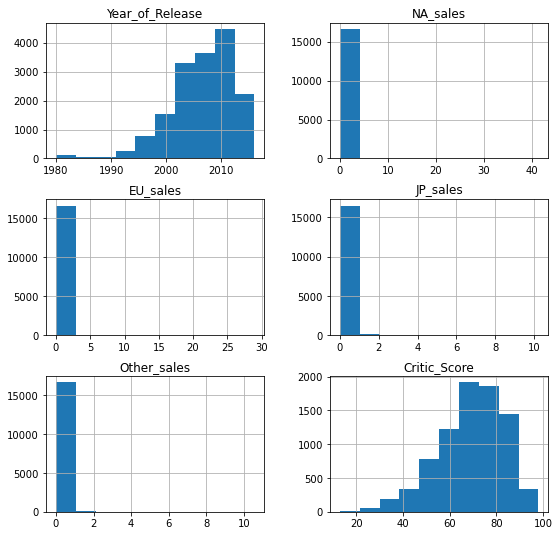

In [7]:
display(games.head(10))
games.info()
display(games.describe())
games.hist(bins=10, figsize=(9, 9))
plt.show()

Перед нами датасет о продаже игр, оценке пользователей, экспертов и жанров, платформы с 1980 по 2016 г. Много пропусков в столбцах `Year_of_Release`,`Critic_Score`,`User_Score`,`Rating`. Где-то будет необходимо поменять тип данных. У данных о продажах часто встречаются значения сильно меньше, чем в последний год. Интересно, это обусловлено наибольшей популярностью индустрии видеоигр или это какая-то ошибка?

**Меняем тип данных**

`user_score` - это же численный показатель, а имеет тип object - меняем на 'float'.
Остальные типы столбцов в порядке.

Визуализируем картину, чтобs понять объем пропусков наглядно. Для этого напишем функцию:

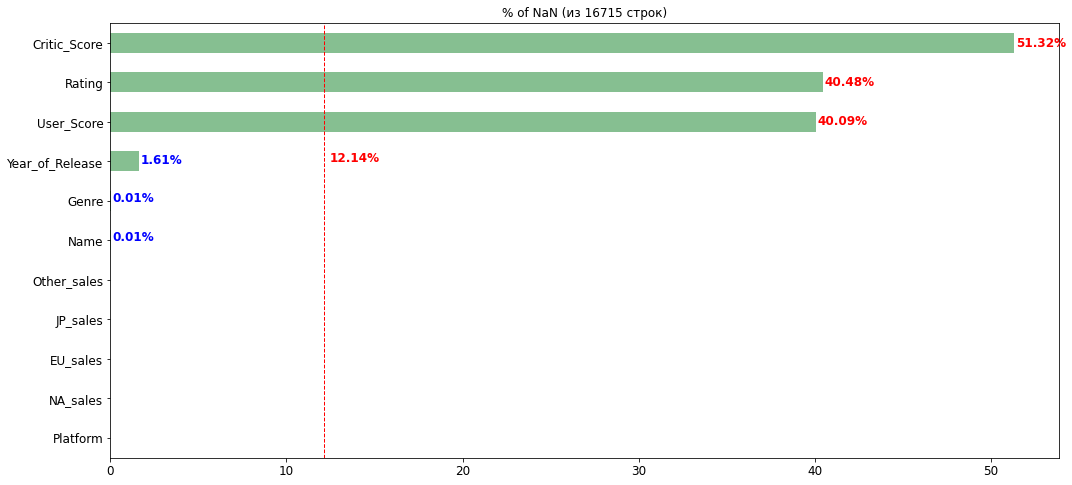

In [8]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isna().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из {} строк)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold

plot, threshold = percent_hbar(games)


Практически половина данных отсутствует по столбцам `critic_score`, `rating` и `user_score`. Такая важная описательная характеристика данных как среднее значение количества пропусков в столбце равна 12%.

Как поступим:

`critic_score` - оценка критиков - вполне возможно, что игры не оценивались критиками, т.к. тогда не было такого "обычая". Было бы неправильно заполнить рейтинг игры средним или медианой, даже если бы мы их считали внутри для каждого жанра отдельно. Тем не менее, чтобы иметь возможность быстрой фильтрации данных и возможность их беспрепятственно обрабатывать, поставим этим играм рейтинг -1 (вдруг у какой-то игры есть нулевой рейтинг, поставив -1, мы никогда не перемешаем игры с NaN и с реально нулевым рейтингом);

`rating` - рейтинг от ESRB предназначен для маркировки игр для США и Канады. Очевидно, что для других регионов он не заполняется.  Поэтому не были заполнены, то есть оценены, либо не набралось достаточное количество оценок - для формирования общей в регионах Северной Америки. Заполним RP, что значит "Категория ещё не присвоена." Играм с категорией RP еще не присвоен окончательный рейтинг ESRB. Такое заполнение пропусков является релеватным, так как по факту так оно и есть, что категория не присвоена и таким образом мы не исключаем данные из всего датасета для исследования, что является важным.

`user_score` - те же причины, вероятно, ранее не было сервисов, которые собирали бы рейтинги игроков. Поэтому и присутствуют пропуски. Поступим так же, как и со столбцом critic_score.
Столбец `year_of_release` (год выпуска игры) имеет 1,6% пропусков, а `name` и `genre` по 0.01%. Не много, средними/медианами эти пропуски не заполнить, эти данные не являются самыми важными для анализа данных. Поэтому самым оптимальным решением является - их удаление.

Ни по одному столбцу заполнить пропуски хотя бы усредненными данными не представляется возможным. Тем не менее, заполним их заглушками, а некоторые удалим для возможности спокойно работать с этими строками по другим параметрам.



Дополнительно проверим, преимущественно ли по старым играм есть эти пропуски:

In [9]:
games.query('Critic_Score.isna() & Rating.isna() & User_Score.isna()')

Name Platform  Year_of_Release         Genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6621 rows x 11 columns]

Предположение неверно. И по довольно новым играм есть такие пропуски.

# Шаг 2. Предобработка данных

 Для удобства работы приведем названия столбцов к нижнему регистру:

In [10]:
games.columns = games.columns.str.lower()

 Изменение типа данных по столбцу `user_score`.

Посмотрим отдельно столбцы user_score - его формат 'object, что очень странно, ведь если бы там были только числа и NaN'ы, то формат был бы 'float':

In [11]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, видим "tbd". Посмотрим, сколько их там таких:

In [12]:
games[games['user_score'] == 'tbd']

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

2500 строк с таким значением.

Почитав FAQ Metacritic'a, найдем, что это аббревиатура от To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Предполагаю, что с таким можно столкнуться, когда анализируешь или малопопулярные игры, или игры, имеющие приоисхождение и, соответственно, аудиторию, большая часть игроков которых не разговаривает по-английски и не оставляет свои отзывы на таких мировых сайтах как Metacritic. Как пример можно привести японские игры и их аудитораю - вряд ли много японских игроков заходят на Metacritic, чтобы написать отзыв на языке, которым они практически не владеют. Они оценивают свои игры на популярных у себя ресурсах.

Но числовой тип столбца нам необходим. Т.к. 'tbd' фактически и является NaN, заменим и NaN, и 'tbd' на значение -1 и приведем значение столбца к числовому:

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

У нас к обработке столбцы critic_score и user_score - заполним пропуски значением -1.

In [14]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [15]:
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isna().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isna().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


Заполним пропуски в `rating` RP:

In [16]:
games['rating'] = games['rating'].fillna('RP')
print('Количество пропусков в столбце rating - {}'.format(games['rating'].isna().sum()))

Количество пропусков в столбце rating - 0


Удалим пропуски в `year_of_release`, `name` и `genre`: 

In [17]:
games = games.dropna(subset=['year_of_release', 'name', 'genre'])

Посмотрим ещё раз на статистику по пропускам:

(<AxesSubplot:title={'center':'% of NaN (из 16444 строк)'}>, 0.0)

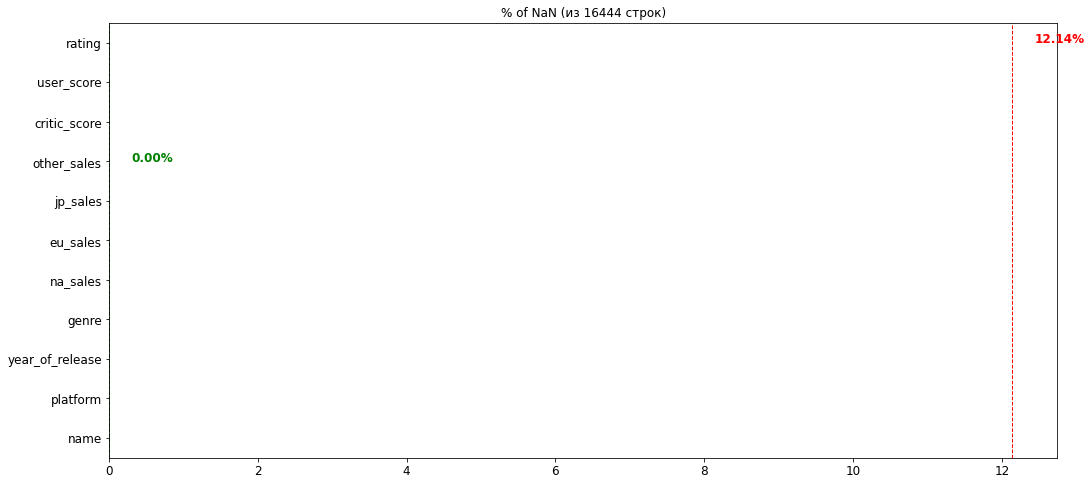

In [18]:
percent_hbar(games, threshold)

Пропуски заполнены, работаем дальше.

Создадим отдельный столбец с суммой продаж по всем регионам `sales_total`:

In [19]:
games['sales_total'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [20]:
print('Количество явных дубликатов в данных:', games.duplicated().sum())

Количество явных дубликатов в данных: 0


Изменим тип данных в столбце год релиза на целочисленный:

In [21]:
games['year_of_release'] = games['year_of_release'].astype('int')

Проверим данные. Ничего ли мы не забыли?

In [22]:
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# Шаг 3. Исследовательский анализ данных

 Для построения графиков при исследовании данных напишем функцию:

In [23]:
def create_any_bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-bright')
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black', title='Количество выпущенных игр')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black', title='Количество выпущенных игр')

**3.1. Количество выпущенных игр по годам:**

Посмотрим, сколько игр выпускалось в каждый из представленных в наших данных годов:

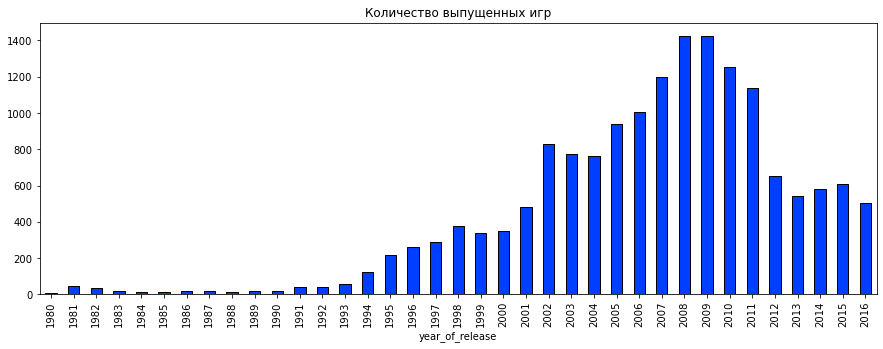

In [24]:
create_any_bar('year_of_release', 'count')

**3.2. Количество выпущенных игр по платформам.**

Посмотрим на то, сколько игр выпускалось на каждую платформу за весь анализируемый период:

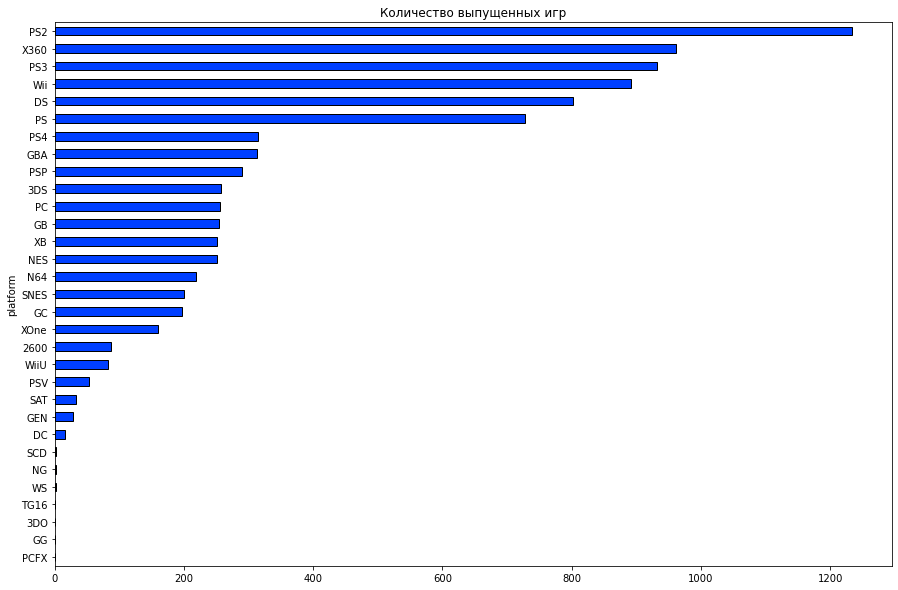

In [25]:
create_any_bar('platform', 'sum', 'sales_total')

Безусловным лидером является платформа PS2. Ожидаемо, она у всех давно на слуху. Много кто играл на ней, как минимум, в детстве.
Далее идут Xbox360, PS3 и Wii.
Самые редкие платформы - представители японских технологий.

**3.3. Динамика продаж игр по платформам.**

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?

Запишем функцию для прорисовки графиков:

In [26]:
def create_any_lines(platforms=None, query=None):
    plt.style.use('tableau-colorblind10') 
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = games.query('platform == @platform')
        else:
            df_to_plot = games.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(10,5), 
                                                                    title='График динамики общих продаж по годам каждой платформы')
        legend_list.append(platform)
    
    ax.set_xlabel('')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))
    
    

**3.1. График динамики продаж по годам по каждой платформе.**

Для удобства при наведении на график отображается платформа, которой этот график "принадлежит":

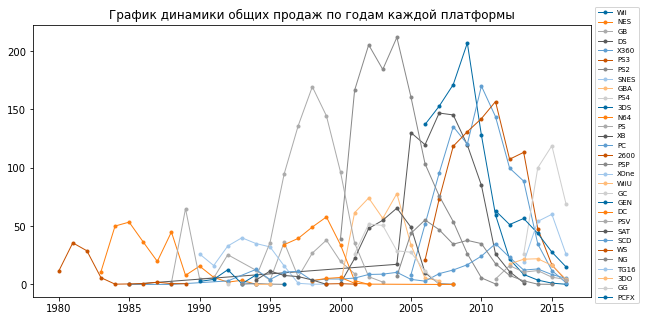

In [27]:
create_any_lines()

Выберем топ платформ, по которым были самые большие суммарные продажи игр за весь рассматриваемый период:

In [28]:
games.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

sales_total
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81

Для топ лучших возьмём на 5 платформ, а 6, так как именно здесь происходи граница в выручке.

In [29]:
top_platforms_1 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

**3.2. График динамики продаж по годам по топ-6 платформ:**

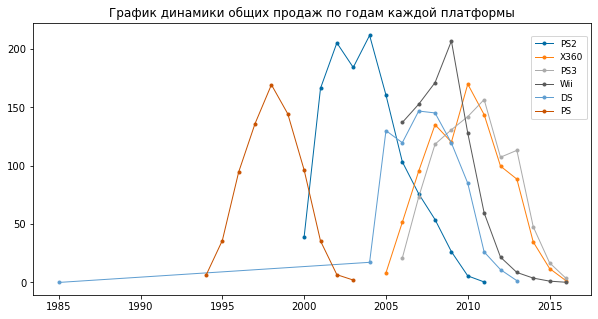

In [30]:
create_any_lines(platforms=top_platforms_1)

PS - прожила с 1994 года до 2003, почти 10 лет;
PS2 - с 2000 до 2011 года - 11 лет;
PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом в 2013 году PS4;
Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя;
DS - вышла в 1985, далее данных нет до 2000 года. Хм, интересно. Что-то здесь не так... В Википедии сказано, что первая консоль DS вышла 21 ноября 2004 года, а поддержка прекратилась 31 августа 2013 года - 9 лет. Отсюда, можно сделать вывод, что значение 1985 годом - является выбросом, что можно удалить.

In [31]:
display(games.query('platform == "DS" and year_of_release == 1985'))
print('Количество строк в датафрейме:', len(games))

name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0          -1.0        -1.0   

      rating  sales_total  
15957     RP         0.02

Количество строк в датафрейме: 16444


In [32]:
games = games.drop(index=15957)
print('Количество строк в датафрейме:', len(games))

Количество строк в датафрейме: 16443


Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Однако, это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

Смотрим на график повторно: 

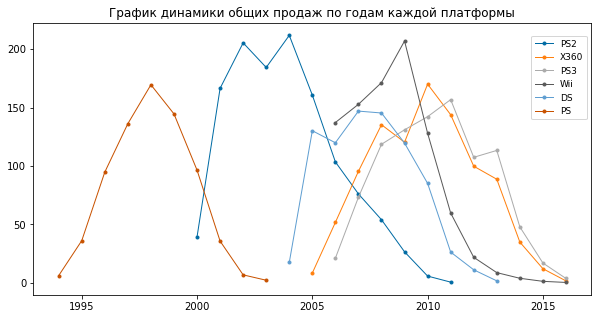

In [33]:
create_any_lines(platforms=top_platforms_1)

**3.3. Динамика продаж игр в наше время.**

Необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на последующие годы.

Лично для меня актуальным периодом является период с 2013 по 2016 год. Почему?

1) начиная с 2013 года, у многих популярных по сей день консолей был пик продаж;
2) в этом периоде представлены данные по абсолютно всем самым популярным консолям.

Предыдущие года отбросим.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:
"Какие платформы лидируют по продажам, растут или падают?"

На основании полученных данных выберем несколько потенциально прибыльных платформ.

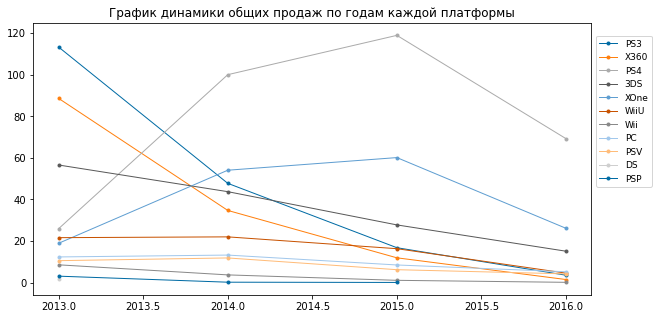

In [34]:
create_any_lines(query='year_of_release >= 2013')

На конец 2016 года лидируют по продажам следующие платформы:

1) PS4;
2) Xone;
3) 3DS.

Это топ-3. Причем, исходя из данных, объём продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.


Для удобства запишем датафрейм за актуальный период в отдельную переменную.

In [35]:
games_actual = games.query('year_of_release >= 2013')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


**3.4. Boxplot по глобальным продажам игр и с разбивкой по платформам.**

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам в актуальный период. Оценим разницу в продажах и в средних продажах на разных платформах. Опишем результат.


In [36]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    if query_condition == None:
        ax = games_actual.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games_actual.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

`Boxplot по глобальным продажам игр.`

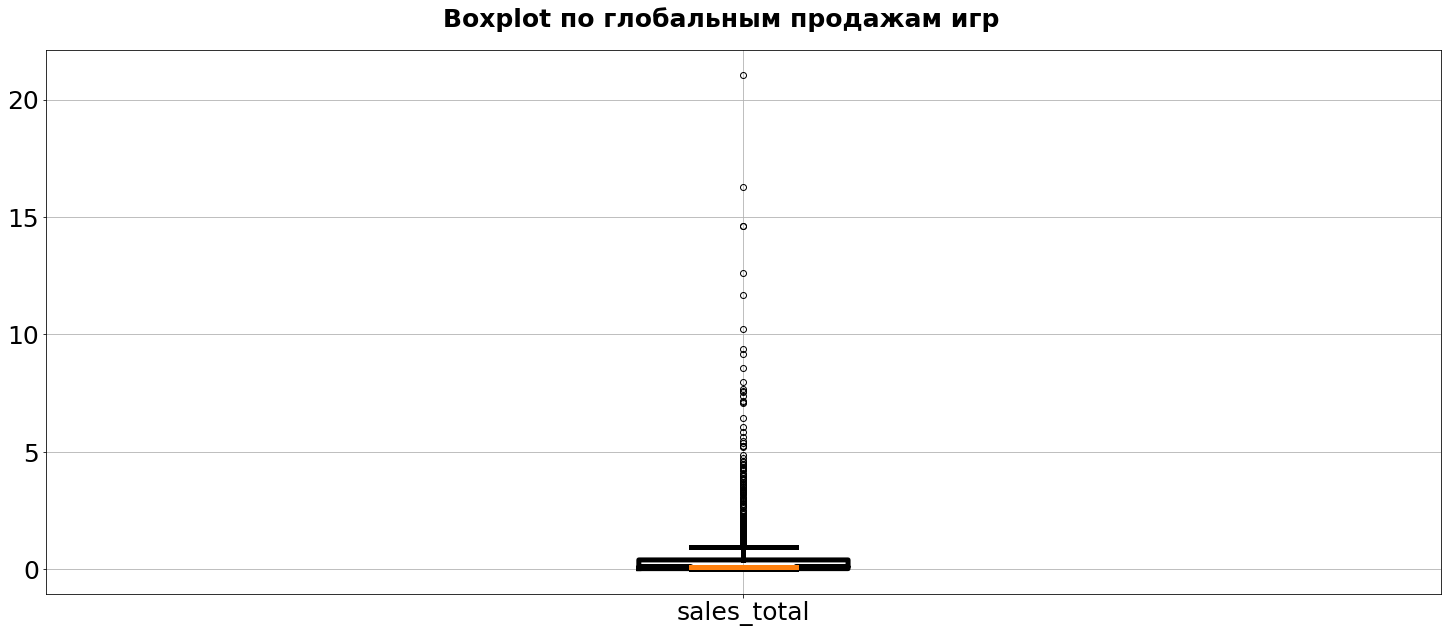

In [37]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр')

Интересный выброс в 80 млн долларов. Посмотрим на него позже.

Посмотрим на график поближе:

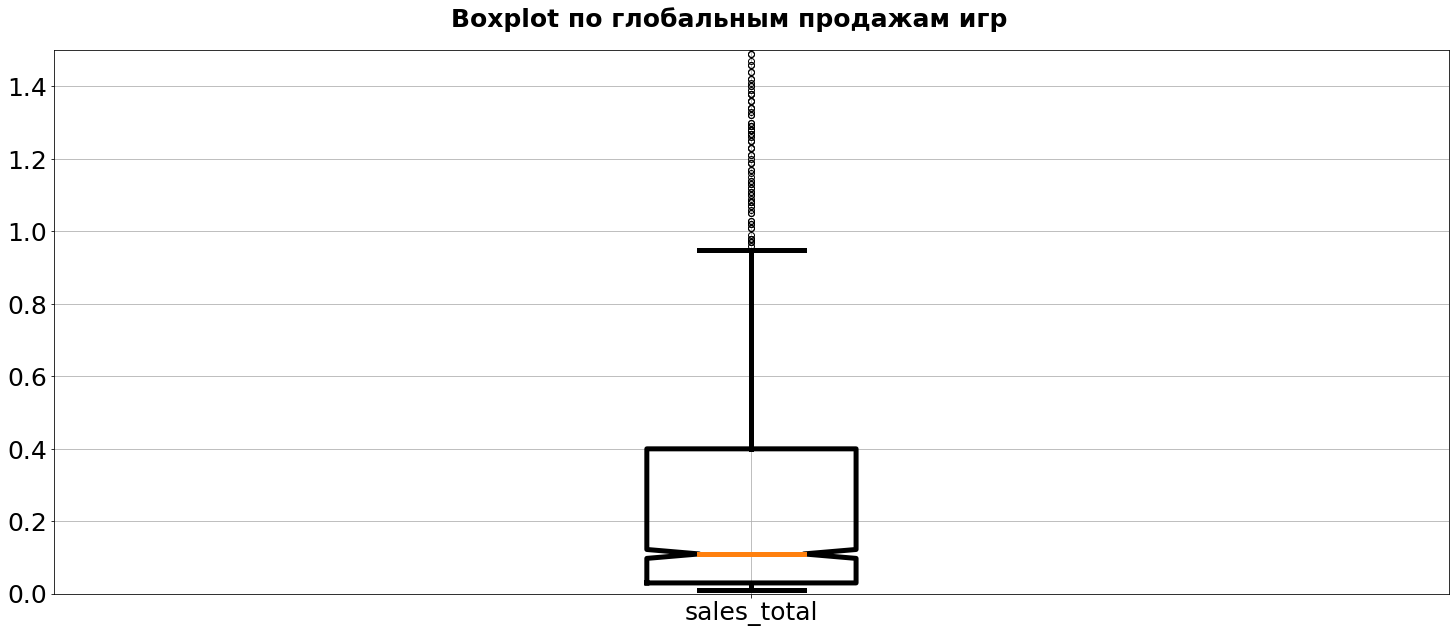

In [38]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0, 1.5])

В среднем, продажи игр составляют менее 1 млн долларов. Медиана - 0,1 миллиона долларов. По-моему это не так много, как кажется.

Построим boxplot по всем платформам в актуальный период:

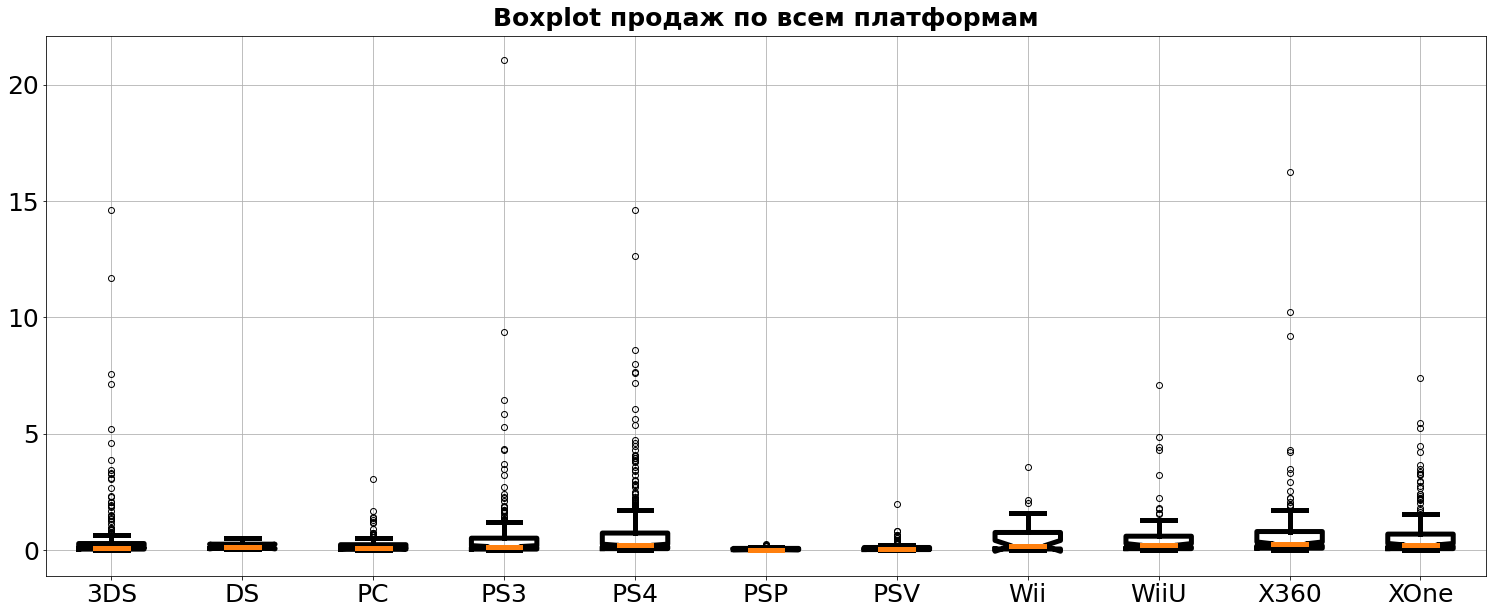

In [39]:
all_platforms = list(games_actual['platform'].unique())
create_any_sales_boxplot('Boxplot продаж по всем платформам', query_condition="platform in @all_platforms")

Пока толком ничего непонятно, но определенно видны выбросы в более 15 млн долларов у PS3 и X360. Посмотрим подробнее:

In [40]:
games_actual.query('platform == "PS3" and year_of_release == 2013').head()

name platform  year_of_release    genre  \
16                Grand Theft Auto V      PS3             2013   Action   
69              Call of Duty: Ghosts      PS3             2013  Shooter   
126                          FIFA 14      PS3             2013   Sports   
149                   The Last of Us      PS3             2013   Action   
337  Assassin's Creed IV: Black Flag      PS3             2013   Action   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16       7.02      9.09      0.98         3.96          97.0         8.2   
69       4.10      3.63      0.38         1.25          71.0         2.6   
126      0.78      4.24      0.07         1.37          86.0         4.3   
149      2.41      2.18      0.28         0.99          95.0         9.1   
337      1.33      1.68      0.13         0.57          88.0         8.1   

    rating  sales_total  
16       M        21.05  
69       M         9.36  
126      E         6.46  
149      M         5.86  
337      M         3.71

In [41]:
games_actual.query('platform == "X360"').head()

name platform  year_of_release    genre  \
23               Grand Theft Auto V     X360             2013   Action   
60             Call of Duty: Ghosts     X360             2013  Shooter   
72                        Minecraft     X360             2013     Misc   
263  Call of Duty: Advanced Warfare     X360             2014  Shooter   
271                         FIFA 14     X360             2013   Sports   

     na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
23       9.66      5.14      0.06         1.41          97.0         8.1   
60       6.73      2.56      0.04         0.91          73.0         2.6   
72       5.70      2.65      0.02         0.81          -1.0        -1.0   
263      2.77      1.11      0.00         0.40          -1.0         4.9   
271      0.92      2.89      0.01         0.40          84.0         4.2   

    rating  sales_total  
23       M        16.27  
60       M        10.24  
72      RP         9.18  
263      M         4.28  
271      E         4.22

Выглядит приемлемо, так как в 2013-ом году у данных игр-консолей был подъём в проадажах, согласно новостям в сети. Посмотрим на общую ситуацию поближе

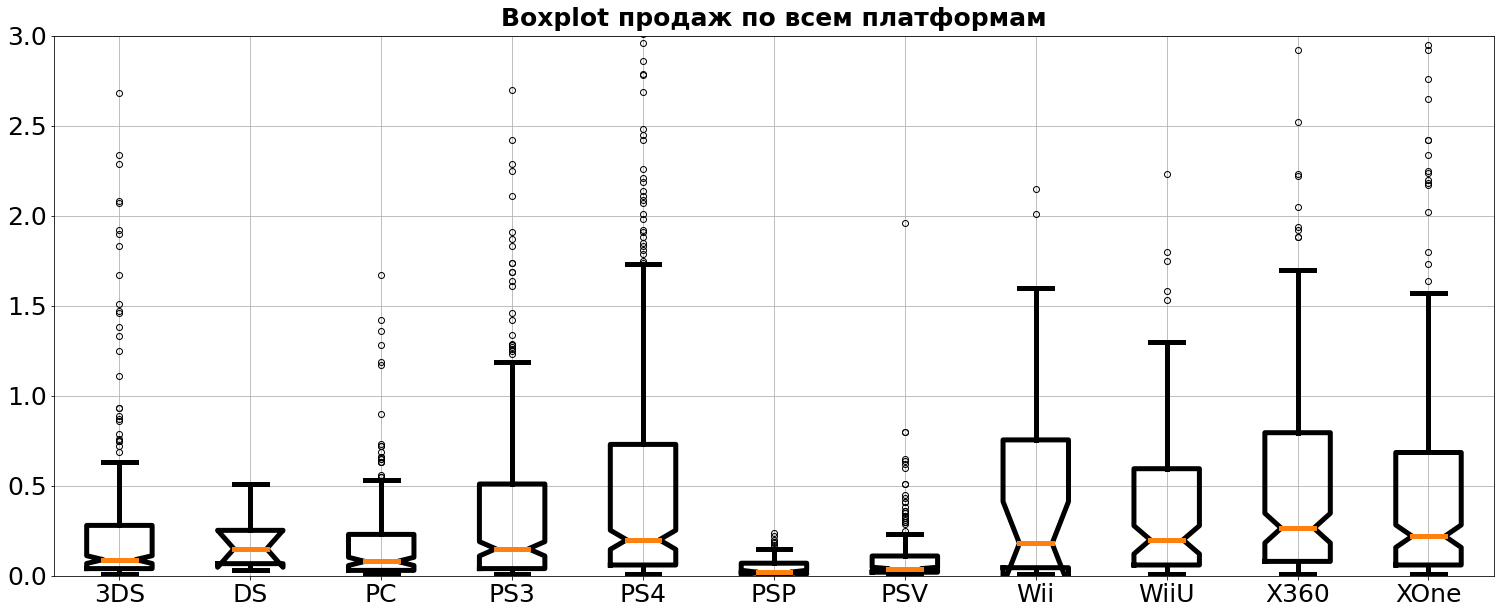

In [42]:
all_platforms = list(games_actual['platform'].unique())
create_any_sales_boxplot('Boxplot продаж по всем платформам', query_condition="platform in @all_platforms", ylims=[0,3])

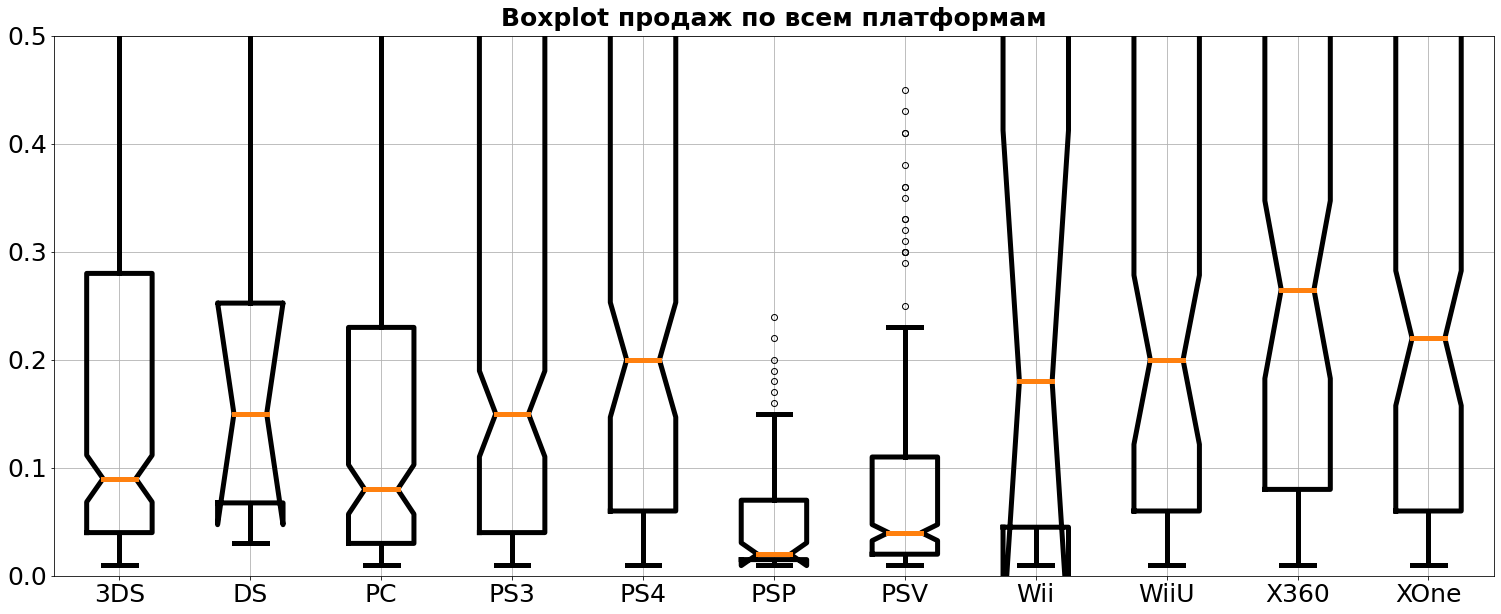

In [43]:
all_platforms = list(games_actual['platform'].unique())
create_any_sales_boxplot('Boxplot продаж по всем платформам', query_condition="platform in @all_platforms", ylims=[0,0.5])

Медианные значения продаж колеблятся от 0.01 до 0.3 млн долларов. Очевидно, что лидируют PS3, PS4, X360, XOne, Wii. WiiU по продажам в актуальный период. PS, PS2, PSV, PSP упали в продажах после взлета PS3 и PS4. А DS и 3DS попросту не так популярны,т.к. в основном на них играют жители Японии.

`Boxplot по наиболее популярным платформам.`

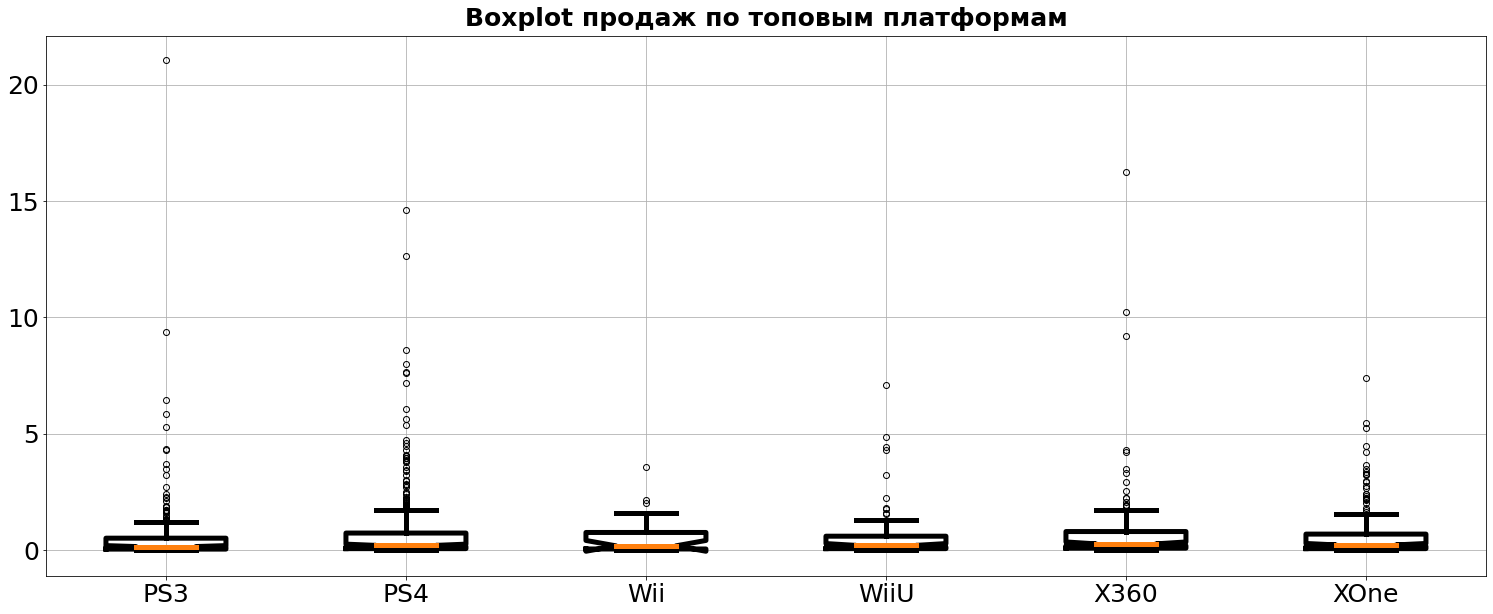

In [44]:
top_platforms = ['PS3', 'PS4', 'X360', 'XOne', 'Wii', 'WiiU']
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms")

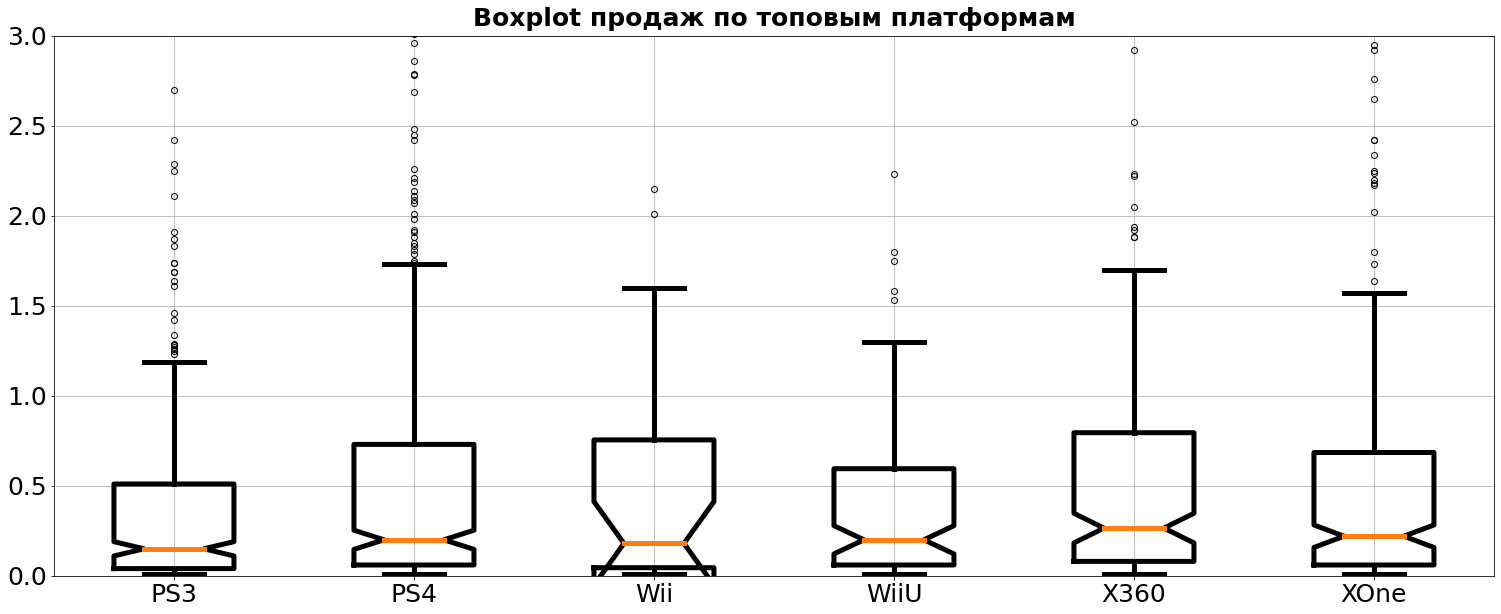

In [45]:
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,3])

Медиана по топовым платформам варьируется от 0,0 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у трёх платформ - PS4, X360, XOne - на уровне 1,7 млн долларов.
У остальных - от 0.5 до 1.6 миллионов долларов.
Среди всех выделяется Nintendo PS - у него эти показатели сильно ниже. Медиана ~ 0,1 миллиона долларов, верхняя граница - 1.2 млн.

**3.5. Влияние отзывов пользователей и критиков на продажи**

За образец возьмем PS3 - она давно на рынке, по ней много данных, при этом даже на конец 2016 года и в периоде 2013-2016 гг. она входит в топ-5 популярных игровых платформ.

**Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков:**

Text(0, 0.5, 'Миллионы проданных копий')

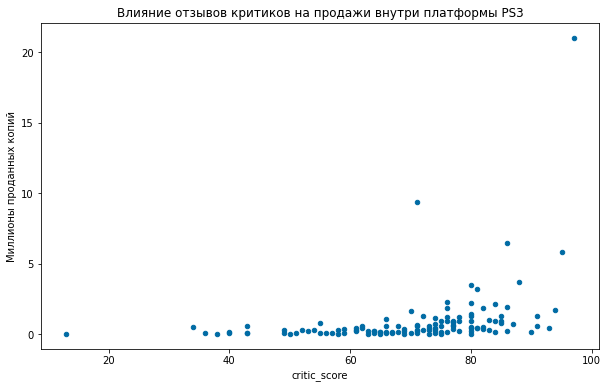

In [46]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

games_ps3_critic = games_actual[(games_actual['platform'] == 'PS3') & (games_actual['critic_score'] > 0)]
games_ps3_critic.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))
plt.title(f'Влияние отзывов критиков на продажи внутри платформы PS3')
plt.ylabel('Миллионы проданных копий')

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю. Однако, корреляция хоть и экспоненциальная положительная, но слабая.

**Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов пользователей:**

Text(0, 0.5, 'Миллионы проданных копий')

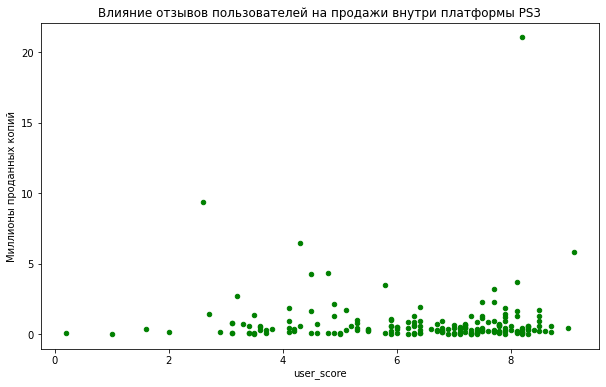

In [47]:
games_ps3_users = games_actual[(games_actual['platform'] == 'PS3') & (games_actual['user_score'] > 0)].copy()
games_ps3_users.plot(kind='scatter', x='user_score', y='sales_total', c='green', figsize=(10,6))
plt.title(f'Влияние отзывов пользователей на продажи внутри платформы PS3')
plt.ylabel('Миллионы проданных копий')

Выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. Квадратичная слабая корреляция.

Посмотрим на диаграммы рассеяния других топовых платформ:

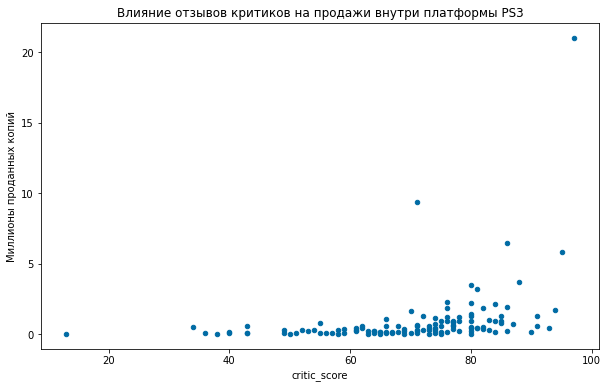

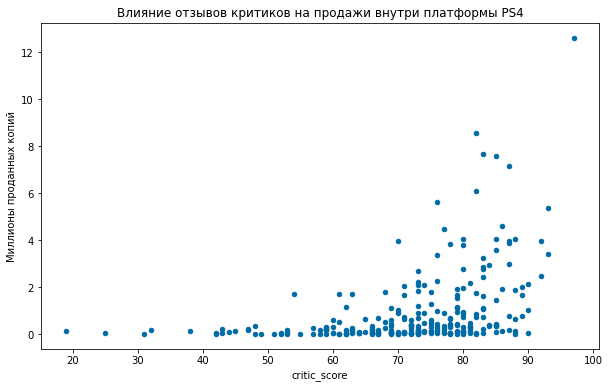

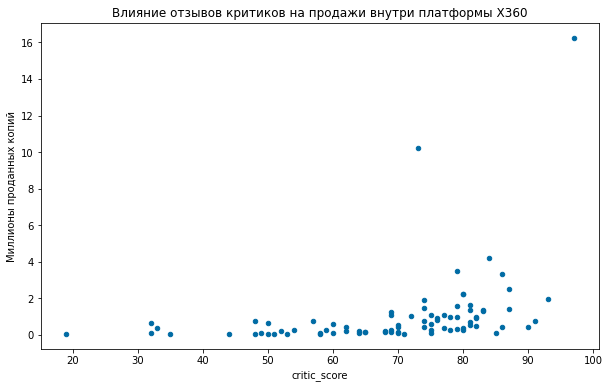

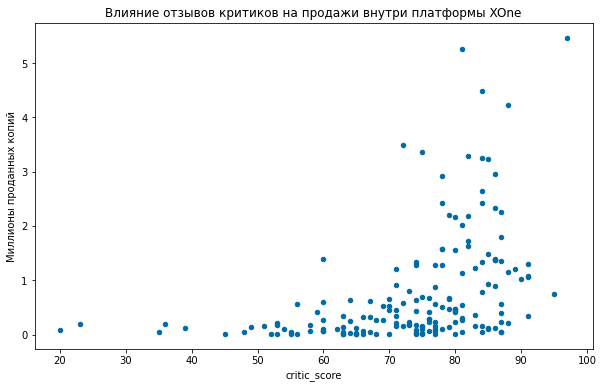

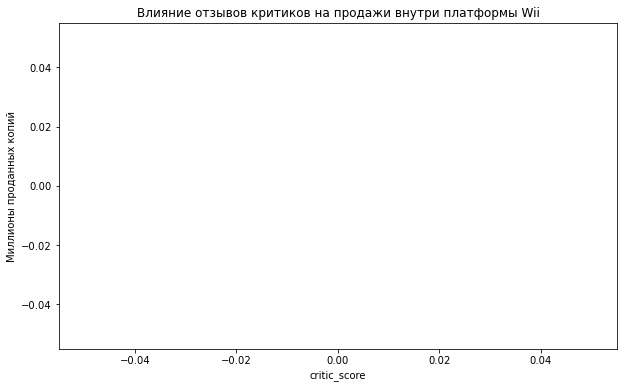

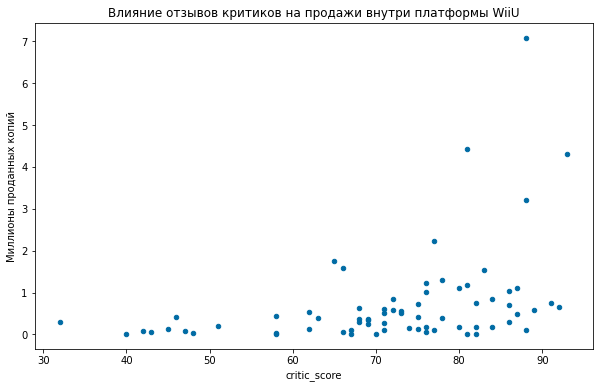

In [48]:
for name in top_platforms:
    games_df_critic = games_actual[(games_actual['platform'] == name) & (games_actual['critic_score'] > 0)]
    games_df_critic.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))
    plt.title(f'Влияние отзывов критиков на продажи внутри платформы {name}')
    plt.ylabel('Миллионы проданных копий')

В основном, слабая экспоненциальная корреляция, то есть влияние есть, но оно слабо выраженное. У Wii - она попросту отсутствует.

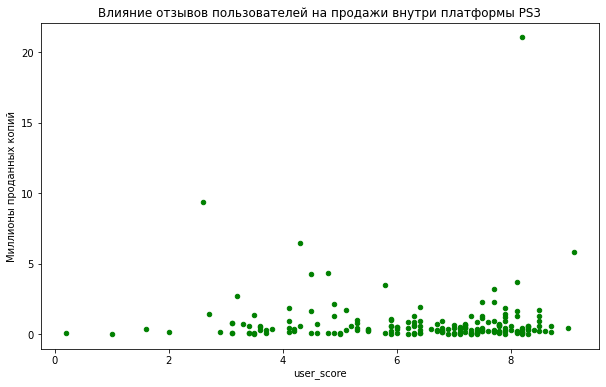

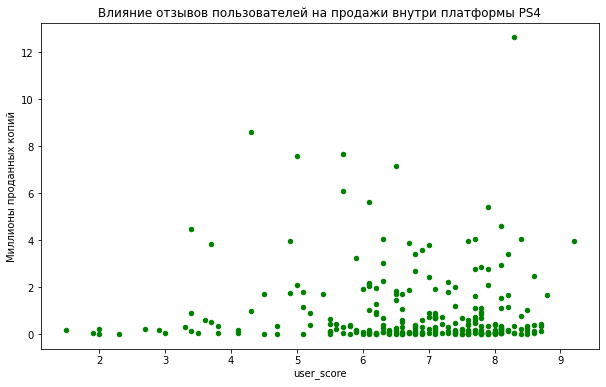

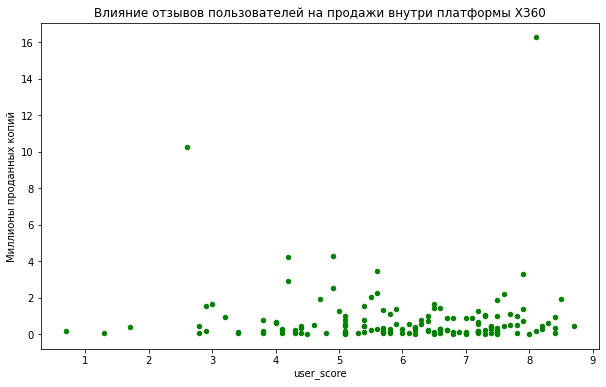

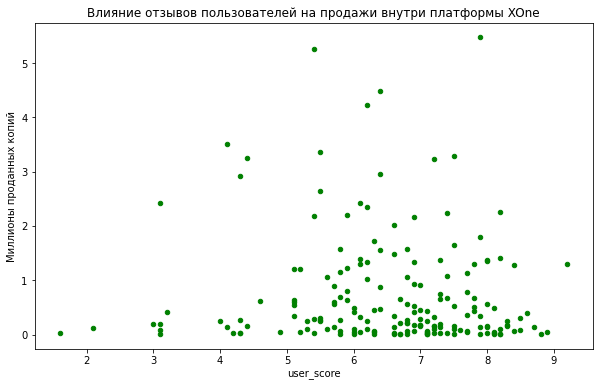

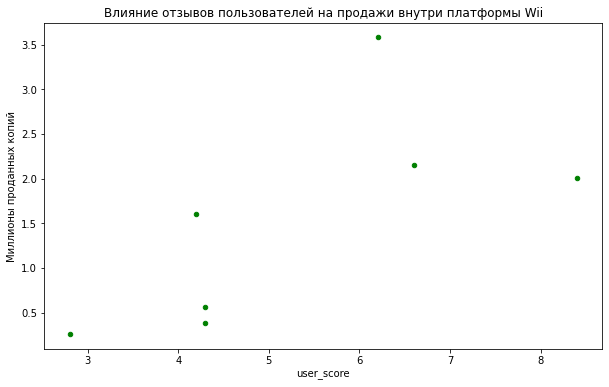

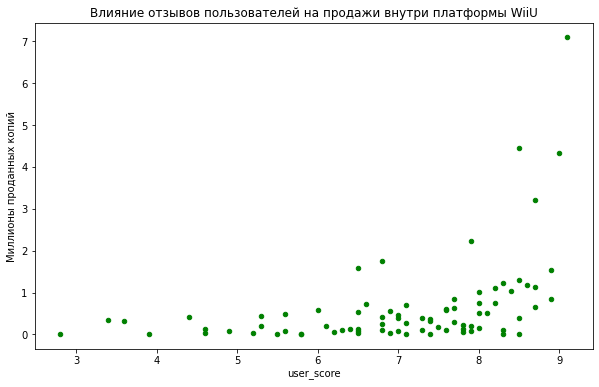

In [49]:
for name in top_platforms:
    games_df_users = games_actual[(games_actual['platform'] == name) & (games_actual['user_score'] > 0)]
    games_df_users.plot(kind='scatter', x='user_score', y='sales_total', c ="green", figsize=(10,6))
    plt.title(f'Влияние отзывов пользователей на продажи внутри платформы {name}')
    plt.ylabel('Миллионы проданных копий')

В основном, очень слабая квадратичная корреляция или нулевая. Хотя у WiiU - очень слабая экспоненциальная, а у Wii - по-прежнему осутствует. По диаграммам рассеивания можно сделать вывод, что влияние отзывов критиков и пользователей на продажи игровых консолей, достаточно слабое, хотя отзывы критиков влияют на продажи чуть больше, чем отзыы пользователей. 

In [50]:
#проверка фильтрации заглушек
games_ps3_critic.critic_score.min(), games_ps3_users.user_score.min()

(13.0, 0.2)

**Матрица корреляции**


Посмотрим внимательно на матрицу корреляции, профильтровав сначала заглушки по оценке критиков, далее - зашлушки по оценке пользователями и сравним результаты. Для оценки корреляции возьмём данные о глобальных продажах, оценке критиков, оценке пользователей.

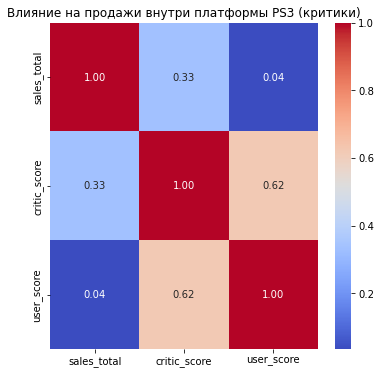

In [51]:
corr_critic_PS3 = games_ps3_critic[['sales_total', 'critic_score', 'user_score']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_critic_PS3, cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Влияние на продажи внутри платформы PS3 (критики)');

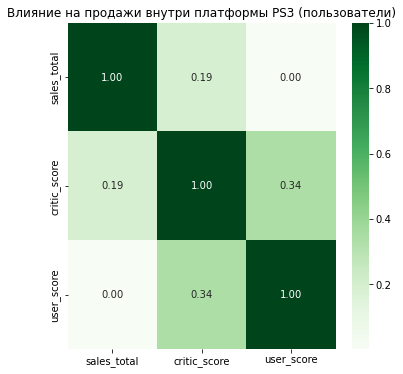

In [52]:
corr_users_PS3 = games_ps3_users[['sales_total', 'critic_score', 'user_score']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_users_PS3, cmap="Greens", annot=True, fmt='.2f')
plt.title('Влияние на продажи внутри платформы PS3 (пользователи)');

Между отзывами критиков и продажами существует слабая положительная корреляция. Между отзывами пользователей и продажами корреляция практически отсутствует. Однако, этого недостаточно для определенного вывода. 

Изучим данные по корреляции по топовым платформам: сначала по отзывам критиков, далее по отзывам пользователей.

Влияние на продажи внутри каждой топовой платформы в период 2013-2016 гг. (оцениваем отзывы критиков и продажи)

C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


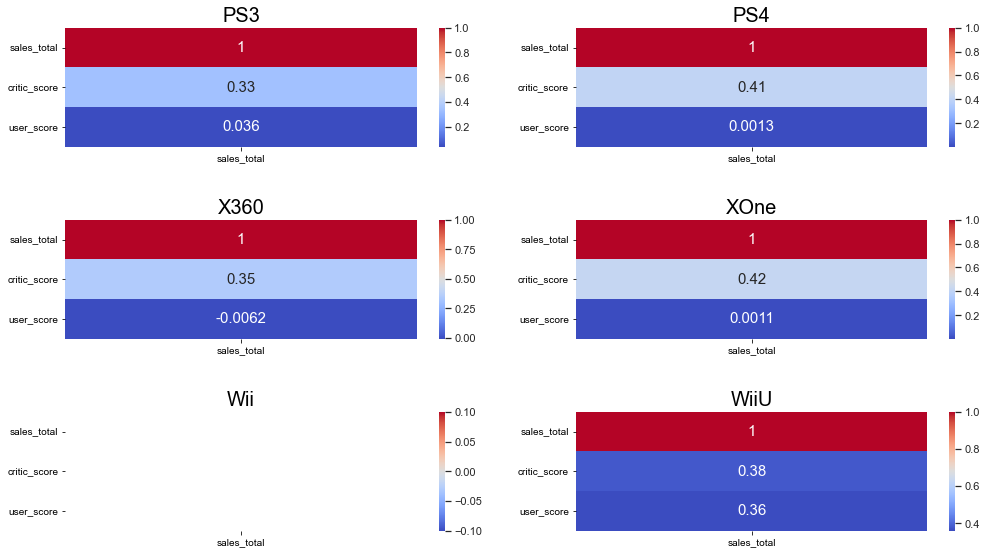

In [53]:
rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games_actual[(games_actual['platform'] == curr_platform) & (games_actual['critic_score'] > 0)]
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="coolwarm", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Наблюдается слабая положительная корреляция, как и у PS3. Только непонятно, почему у Wii отсутствует расчёт корреляции... Посмотрим на данные строки.

In [54]:
print(games_actual.query('platform == "Wii"').count())
games_actual.query('platform == "Wii"')

name               23
platform           23
year_of_release    23
genre              23
na_sales           23
eu_sales           23
jp_sales           23
other_sales        23
critic_score       23
user_score         23
rating             23
sales_total        23
dtype: int64


name platform  \
359                                      Just Dance 2014      Wii   
766                                Skylanders SWAP Force      Wii   
850                                      Just Dance 2015      Wii   
1158                                     Disney Infinity      Wii   
2179                                     Just Dance 2016      Wii   
2180                               Skylanders: Trap Team      Wii   
3611                                             FIFA 15      Wii   
4985                                             FIFA 14      Wii   
6443                               Angry Birds Star Wars      Wii   
7137                          Zumba Fitness: World Party      Wii   
7991                          How to Train Your Dragon 2      Wii   
8009                                     Just Dance 2017      Wii   
8941                           Skylanders: SuperChargers      Wii   
9110                                     Disney's Planes      Wii   
10911                                       The Smurfs 2      Wii   
11922                     The Croods: Prehistoric Party!      Wii   
12958  Pretty Cure All Stars Everyone Gather ? Let's ...      Wii   
13570                        Disney Planes Fire & Rescue      Wii   
14682                Barbie and Her Sisters Puppy Rescue      Wii   
14840                              Young Justice: Legacy      Wii   
16044                           Turbo: Super Stunt Squad      Wii   
16144                             Penguins of Madagascar      Wii   
16312                  Monster High: New Ghoul in School      Wii   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
359               2013        Misc      1.88      1.39      0.00         0.31   
766               2013    Platform      1.21      0.75      0.00         0.19   
850               2014        Misc      0.99      0.85      0.00         0.17   
1158              2013      Action      1.05      0.41      0.00         0.14   
2179              2015        Misc      0.41      0.46      0.00         0.08   
2180              2014      Action      0.41      0.46      0.00         0.08   
3611              2014      Sports      0.15      0.37      0.00         0.04   
4985              2013      Sports      0.00      0.36      0.00         0.02   
6443              2013    Strategy      0.15      0.09      0.00         0.02   
7137              2013        Misc      0.11      0.10      0.00         0.02   
7991              2014   Adventure      0.04      0.13      0.00         0.01   
8009              2016        Misc      0.06      0.11      0.00         0.01   
8941              2015      Action      0.02      0.12      0.00         0.01   
9110              2013  Simulation      0.07      0.06      0.00         0.01   
10911             2013    Platform      0.00      0.09      0.00         0.01   
11922             2013        Misc      0.01      0.05      0.00         0.00   
12958             2013        Misc      0.00      0.00      0.05         0.00   
13570             2014      Action      0.00      0.04      0.00         0.00   
14682             2015      Action      0.00      0.03      0.00         0.00   
14840             2013      Action      0.00      0.03      0.00         0.00   
16044             2013      Sports      0.00      0.01      0.00         0.00   
16144             2014      Action      0.00      0.01      0.00         0.00   
16312             2015      Action      0.00      0.01      0.00         0.00   

       critic_score  user_score rating  sales_total  
359            -1.0         6.2   E10+         3.58  
766            -1.0         6.6   E10+         2.15  
850            -1.0         8.4   E10+         2.01  
1158           -1.0         4.2   E10+         1.60  
2179           -1.0        -1.0   E10+         0.95  
2180           -1.0        -1.0   E10+         0.95  
3611           -1.0         4.3      E         0.56  
4985           -1.

Теперь понятно почему: игры консоли Wii не были оценены критиками, поэтому при фильтрации коэффициент корреляции не был подсчитан. 

Влияние на продажи внутри каждой топовой платформы в период 2013-2016 гг. (оцениваем отзывы пользователей и продажи)

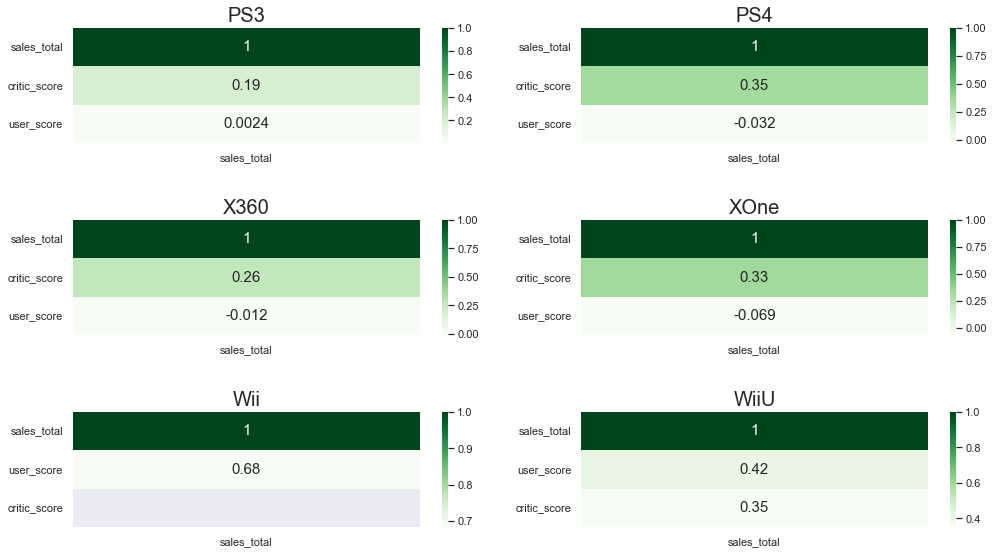

In [55]:
rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games_actual[(games_actual['platform'] == curr_platform) & (games_actual['user_score'] > 0)]
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Хм, отзывы пользователей не влияют на продажи в топовых платформах. Однако, интересно, что на продажи консолей Wii и WiiU и отзывы критиков, и отзывы пользователей влияют средне. У Wii может быть такое, так как других отзывов попросту нет, и поэтому они могут опираться только на отзывы пользователей (по-моему мнению для улучшения пользовательского дизайна - это не так уж и плохо).А у WiiU - стоит проверить.

In [56]:
print(games_actual.query('platform == "WiiU" and rating == "RP"').count())
games_actual.query('platform == "WiiU" and rating == "RP"').head(10)

name               30
platform           30
year_of_release    30
genre              30
na_sales           30
eu_sales           30
jp_sales           30
other_sales        30
critic_score       30
user_score         30
rating             30
sales_total        30
dtype: int64


name platform  \
216                 Super Smash Bros. for Wii U and 3DS     WiiU   
978                 The Legend of Zelda: The Wind Waker     WiiU   
2636  Mario & Sonic at the Sochi 2014 Olympic Winter...     WiiU   
2973                                          Minecraft     WiiU   
3118           Disney Infinity 2.0: Marvel Super Heroes     WiiU   
4258                                Disney Infinity 3.0     WiiU   
4753                                     Dragon Quest X     WiiU   
5376        Mario & Sonic at the Rio 2016 Olympic Games     WiiU   
6273                        Need for Speed: Most Wanted     WiiU   
6699                   Shin Megami Tensei x Fire Emblem     WiiU   

      year_of_release         genre  na_sales  eu_sales  jp_sales  \
216              2014      Fighting      2.60      1.08      0.81   
978              2013        Action      0.92      0.60      0.14   
2636             2013        Sports      0.37      0.22      0.13   
2973             2016          Misc      0.28      0.17      0.18   
3118             2014        Action      0.37      0.22      0.00   
4258             2015        Action      0.21      0.21      0.00   
4753             2013  Role-Playing      0.00      0.00      0.41   
5376             2016        Action      0.07      0.14      0.11   
6273             2013        Racing      0.13      0.12      0.00   
6699             2015  Role-Playing      0.12      0.05      0.06   

      other_sales  critic_score  user_score rating  sales_total  
216          0.38          -1.0        -1.0     RP         4.87  
978          0.14          -1.0        -1.0     RP         1.80  
2636         0.06          -1.0        -1.0     RP         0.78  
2973         0.04          -1.0        -1.0     RP         0.67  
3118         0.06          -1.0        -1.0     RP         0.65  
4258         0.04          -1.0        -1.0     RP         0.46  
4753         0.00          -1.0        -1.0     RP         0.41  
5376         0.02          -1.0        -1.0     RP         0.34  
6273         0.02          -1.0        -1.0     RP         0.27  
6699         0.02          -1.0        -1.0     RP         0.25

У тех игр WiiU, где отсуствуют оценки критиков и пользователей, в основном, не определена категория по ESRB. 30/115 = 26%  данных по этой платформе за актуальный период неизвестны. Поскольку WiiU - японская разработка, то понятно, почему рейтинг RP. Также, заметна связь между рейтингом и отзывами критиков и пользователей. Отсюда следует, что значение данной корреляции не отражает действительность и мы не будем брать во внимание значение данной корреляции.

Отсюда вопрос: а что вообще влияет на продажи игр, если это ни оценка критиками, ни оценка пользователями? Очевидно, что это продажи в популярных регионах (Северная Америка, Япония, Европа). Построим общую матрицу корреляции ( без оценки отзывов пользователей и отзывов критиков, поэтому не фильтруем), чтобы убедиться в этом.

<AxesSubplot:>

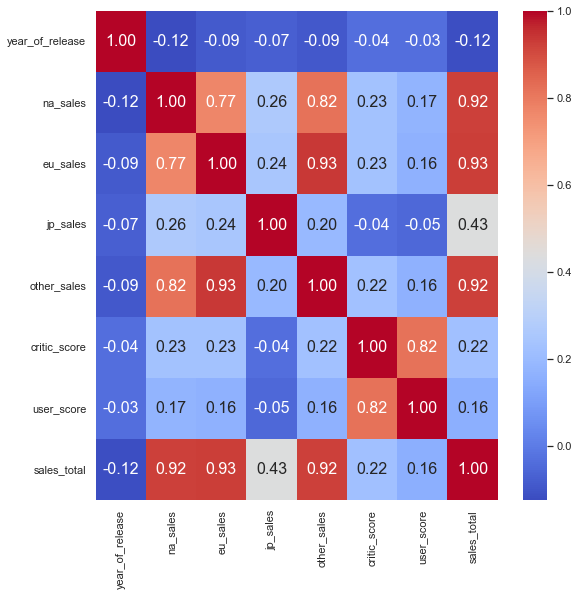

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(games_actual.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={'size':16})

Понятнеее не стало.. Нужно смотреть не только топовые платформы, но и платформы с меньшими продажами. Построим диаграммы рассеяния и матрицы корреляции для платформ из разных категорий (рандомно). И посмотрим, есть ли разница.

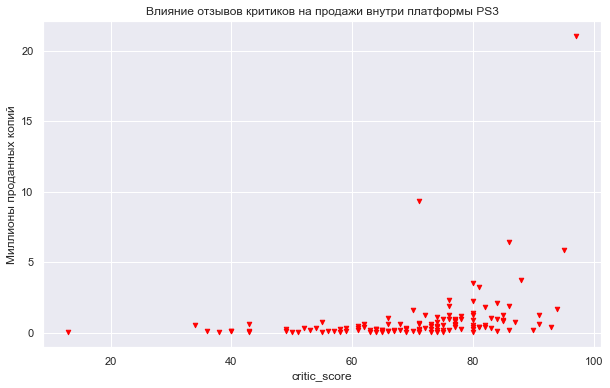

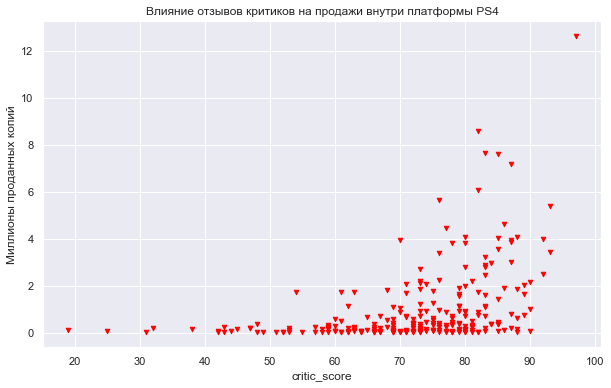

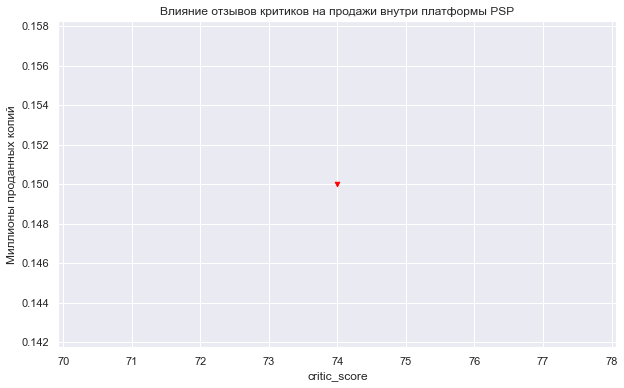

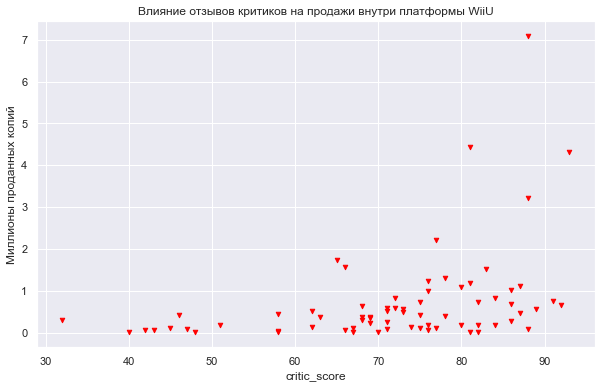

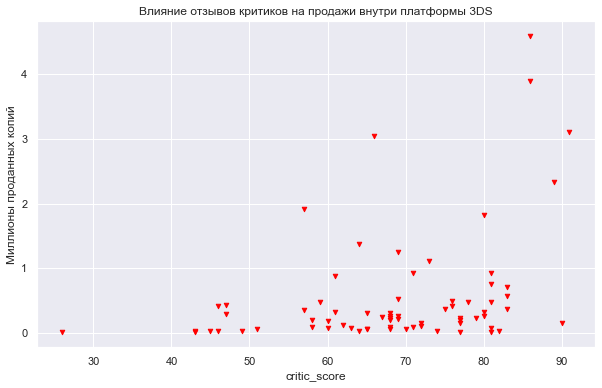

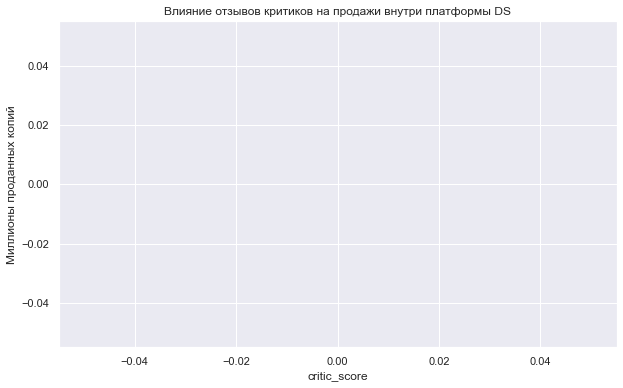

In [58]:
different_platforms = ['PS3', 'PS4', 'PSP', 'WiiU','3DS','DS']

for name in different_platforms:
    games_df_critic = games_actual[(games_actual['platform'] == name) & (games_actual['critic_score'] > 0)]
    games_df_critic.plot(kind='scatter', x='critic_score', y='sales_total', marker='v', c='red', figsize=(10,6))
    plt.title(f'Влияние отзывов критиков на продажи внутри платформы {name}')
    plt.ylabel('Миллионы проданных копий')

Чем больше отзывов критиков и их оценка, тем большем продажи, это видно у топовых платформ, которые были оценены по рейтингу ESRB.Этого рейтинга нет или мало оценено количество игр от данной платформы. 

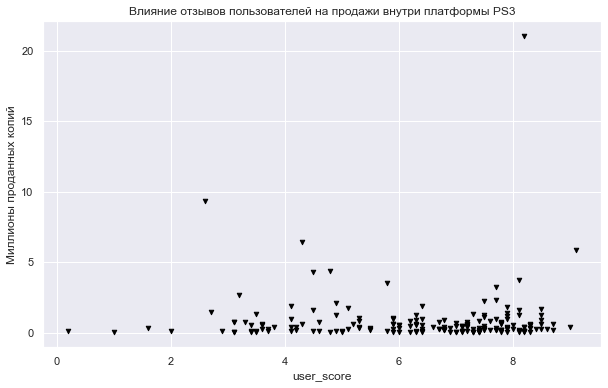

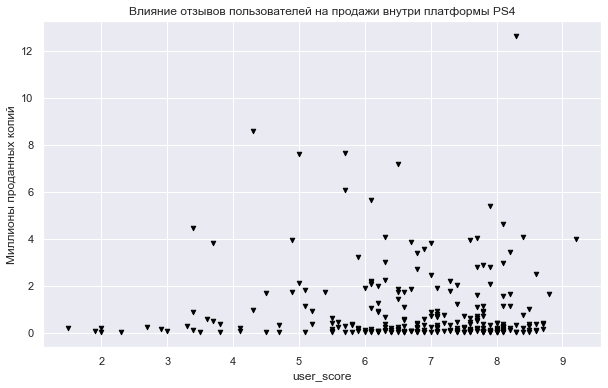

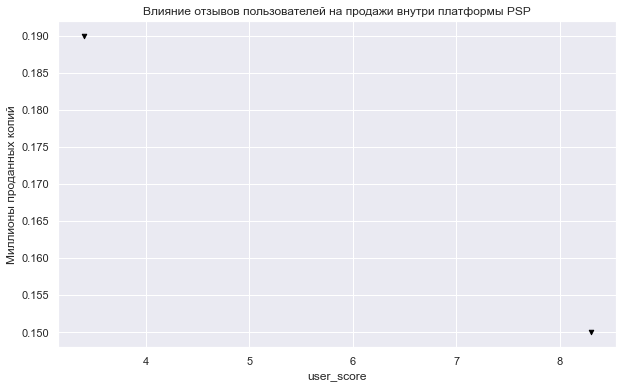

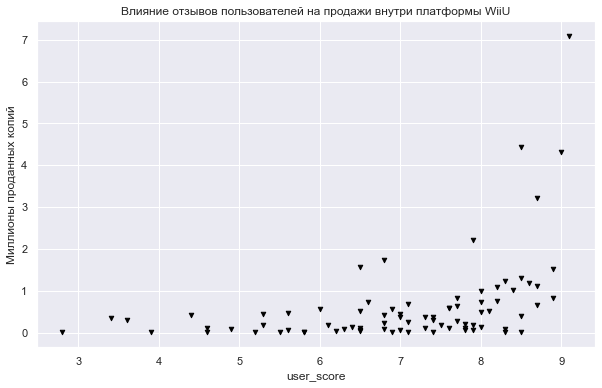

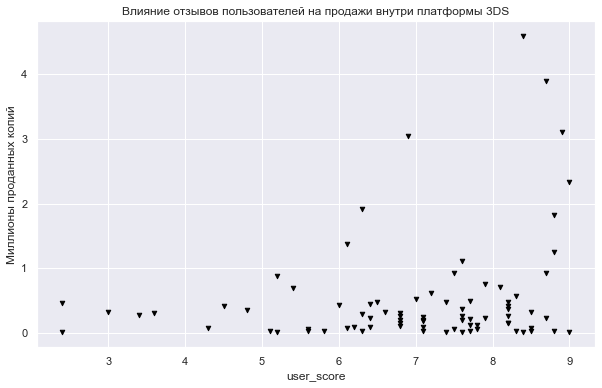

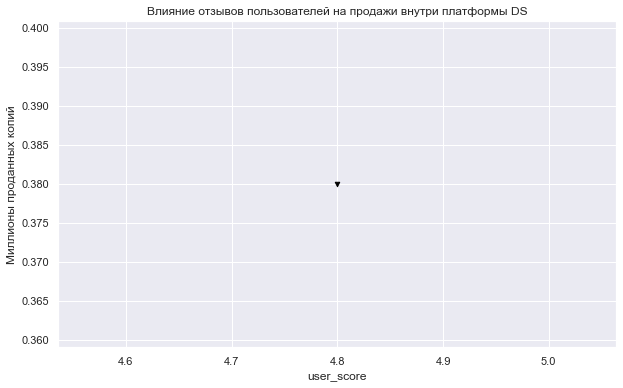

In [59]:
for name in different_platforms:
    games_df_user = games_actual[(games_actual['platform'] == name) & (games_actual['user_score'] > 0)]
    games_df_user.plot(kind='scatter', x='user_score', y='sales_total', marker='v', c='black', figsize=(10,6))
    plt.title(f'Влияние отзывов пользователей на продажи внутри платформы {name}')
    plt.ylabel('Миллионы проданных копий')

Если сравнивать не только популярные платформы, но и непопулярные, то можно заметить очень слабую корреляцию у тех игр, которые были оценены по рейтингу ESRB. 

Посмотрим на коэффициент корреляции платформ разной популярности. (сначаал отзывы критиков, далее отзывы пользователей)

C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


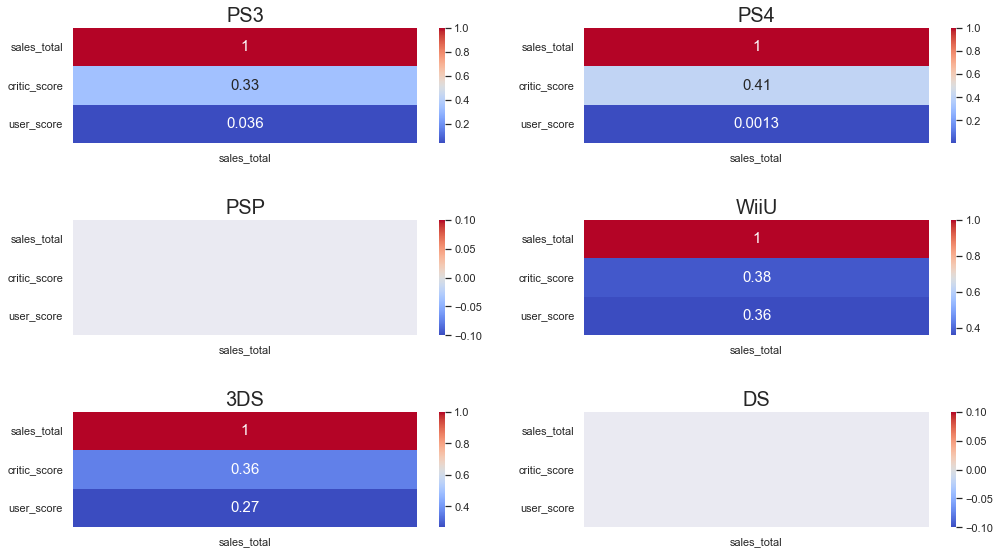

In [60]:
rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = different_platforms[count]
        df_prep = games_actual[(games_actual['platform'] == curr_platform) & (games_actual['critic_score'] > 0)]
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="coolwarm", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Слабая положительная корреляция, как и было выяснено ранее.

C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


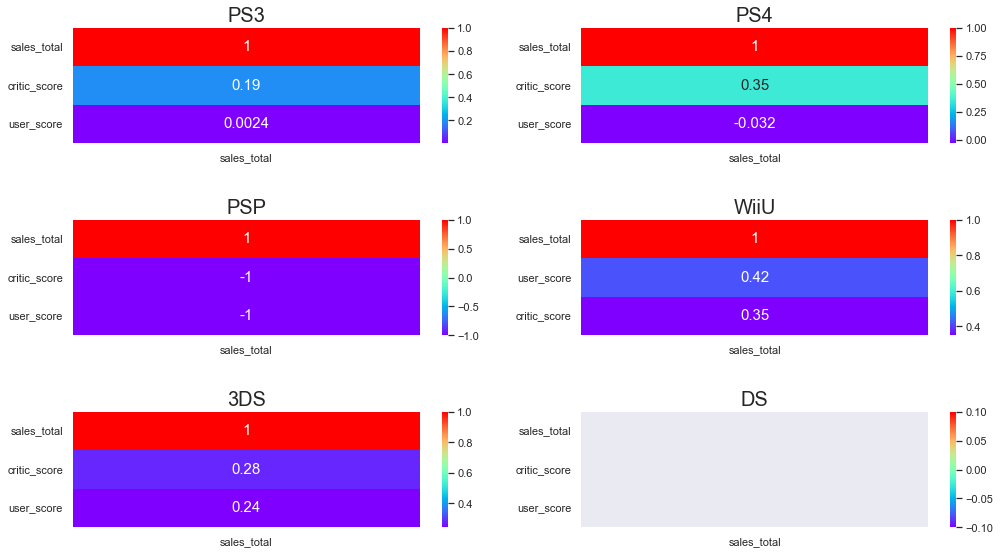

In [61]:
rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = different_platforms[count]
        df_prep = games_actual[(games_actual['platform'] == curr_platform) & (games_actual['user_score'] > 0)]
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="rainbow", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

In [62]:
print(games_actual.query('platform == "PSP"').count())
display(games_actual.query('platform == "PSP"').head(10))
print(games_actual.query('platform == "PSP" and rating == "RP"').count())

name               67
platform           67
year_of_release    67
genre              67
na_sales           67
eu_sales           67
jp_sales           67
other_sales        67
critic_score       67
user_score         67
rating             67
sales_total        67
dtype: int64


name platform  year_of_release  \
6915                        God Eater 2      PSP             2013   
7126  Sword Art Online: Infinity Moment      PSP             2013   
7647             Pro Yaky? Spirits 2013      PSP             2013   
7875                            FIFA 14      PSP             2013   
8134        Toukiden: The Age of Demons      PSP             2013   
8334   Jikkyou Powerful Pro Yakyuu 2013      PSP             2013   
8488          Pro Evolution Soccer 2014      PSP             2013   
8969                     Summon Night 5      PSP             2013   
9611                 7th Dragon 2020-II      PSP             2013   
9839                     Fate/Extra CCC      PSP             2013   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
6915  Role-Playing       0.0      0.00      0.24         0.00          -1.0   
7126  Role-Playing       0.0      0.00      0.22         0.00          -1.0   
7647        Sports       0.0      0.00      0.20         0.00          -1.0   
7875        Sports       0.0      0.15      0.00         0.04          -1.0   
8134        Action       0.0      0.00      0.18         0.00          -1.0   
8334        Sports       0.0      0.00      0.17         0.00          -1.0   
8488        Action       0.0      0.02      0.14         0.00          -1.0   
8969  Role-Playing       0.0      0.00      0.15         0.00          74.0   
9611  Role-Playing       0.0      0.00      0.13         0.00          -1.0   
9839        Action       0.0      0.00      0.12         0.00          -1.0   

      user_score rating  sales_total  
6915        -1.0     RP         0.24  
7126        -1.0     RP         0.22  
7647        -1.0     RP         0.20  
7875         3.4      E         0.19  
8134        -1.0     RP         0.18  
8334        -1.0     RP         0.17  
8488        -1.0      E         0.16  
8969         8.3      T         0.15  
9611        -1.0     RP         0.13  
9839        -1.0     RP         0.12

name               64
platform           64
year_of_release    64
genre              64
na_sales           64
eu_sales           64
jp_sales           64
other_sales        64
critic_score       64
user_score         64
rating             64
sales_total        64
dtype: int64


Такая же ситуация как и у Wii, DS, поэтому не учитываем. Сохраняется очень слабая корреляция, практически нулевое влияние.

Данные по корреляции между выручкой и оценкой по платформам PS3, X360, PS4, XOne и более или менее совпадает с общими данными по датафрейму. Отзывы критиков слабо влияют, отзывы пользователей практически никак не влияют на продажи игр. 
Выделяются Wii, DS, 3DS, Wii, WiiU, PSP, так как не был выставлен рейтинг ESRB (азиатские консоли, либо старые), в связи с чем нет отзывов критиков и пользователей. Таким образом, была найдена связь между рейтингои и отзывами пользователей и критиками, и межлу отзывами критиком и продажами. 

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
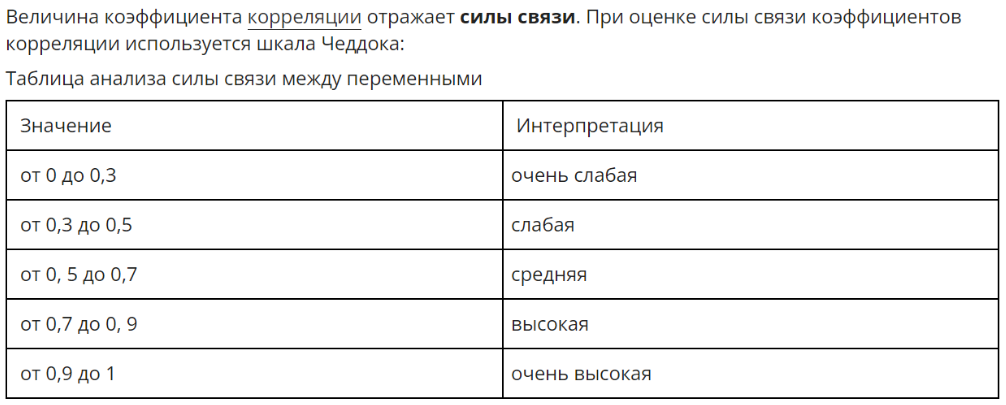

**3.6.Распределение игр по жанрам.**

Нарисуем столбчатую диаграмму с количеством и общей суммой продаж и расскажем о самых прибыльных жанрах, а потом посмотрим на особенности жанров с высокими и низкими продажами.

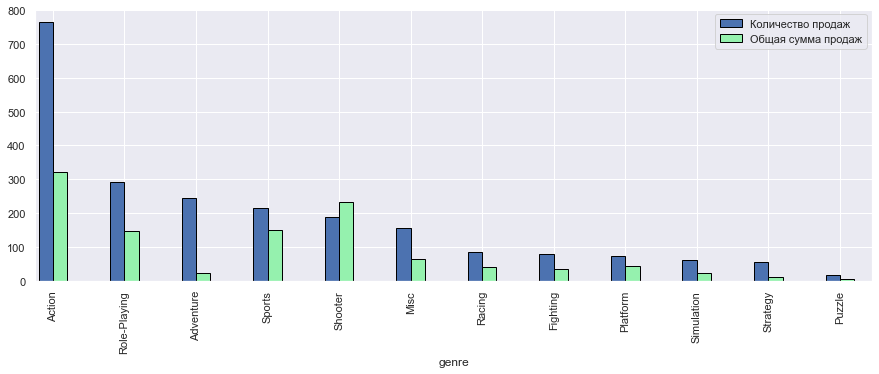

In [63]:
ax = plt.gca()

pivot = games_actual.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['sales_total']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#95f1ae', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

Больше всего игр жанра Action. За ними идут игры спортивного жанра. Причем даже учитывая то, что игр жанра "Спорт" заметно меньше на рынке (на треть от Action), выручка от продаж у них практически одинаковая. Это значит, что спортивные игры, в среднем, стоят дороже, чем шутеры. Ну и это ожидаемо, шутеры выходят преимущественно на ПК, тогда как спортивные игры - на консолях. А там явно и дела с пиратством лучше обстоят, да и сами лицензионные копии дороже.


Ловушка: Если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, то есть на этот жанр есть устойчивый спрос.

Сравним медианные значения продаж и сдаелаем выводы.

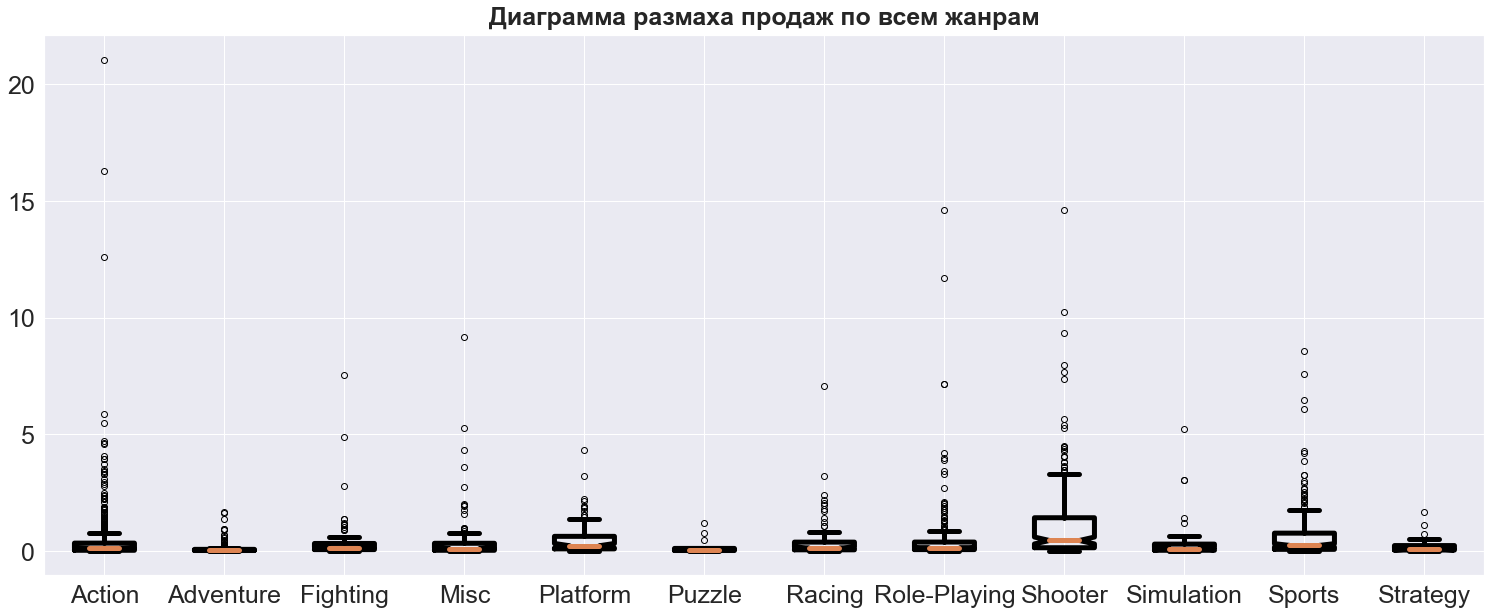

In [64]:
all_genres = list(games_actual['genre'].unique())
create_any_sales_boxplot('Диаграмма размаха продаж по всем жанрам', query_condition="genre in @all_genres")

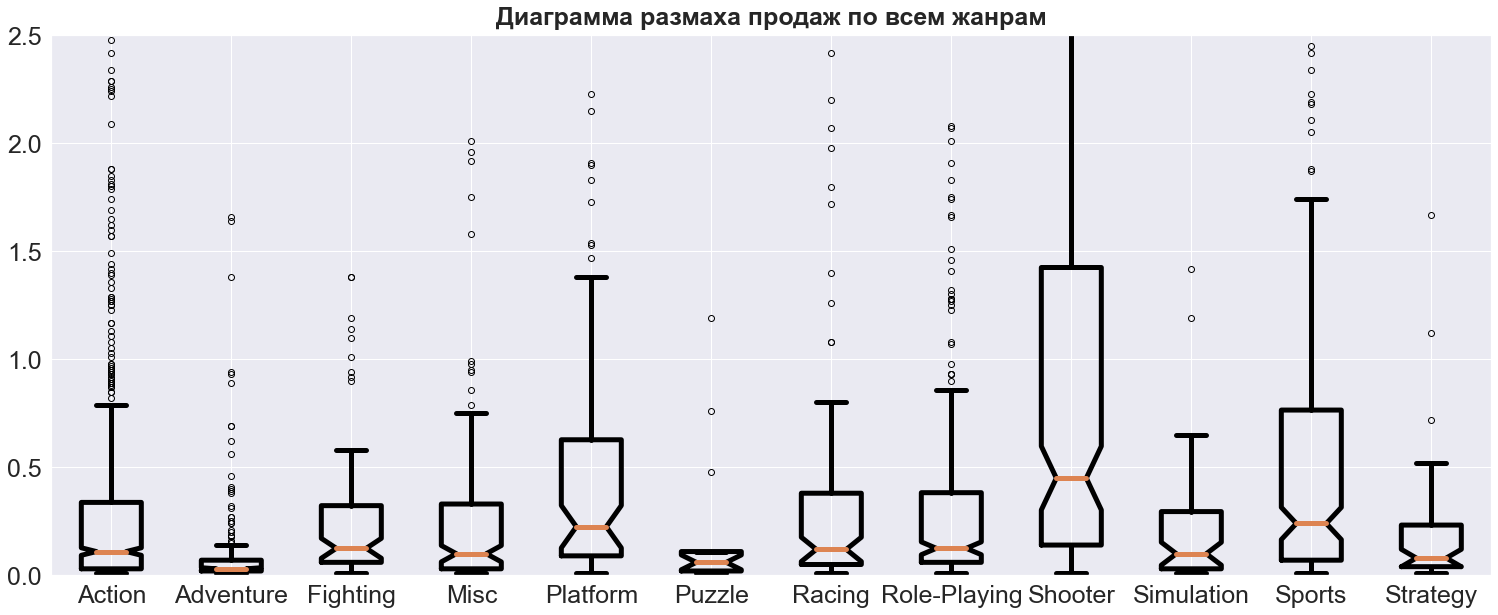

In [65]:
create_any_sales_boxplot('Диаграмма размаха продаж по всем жанрам', query_condition="genre in @all_genres", ylims=[0,2.5])

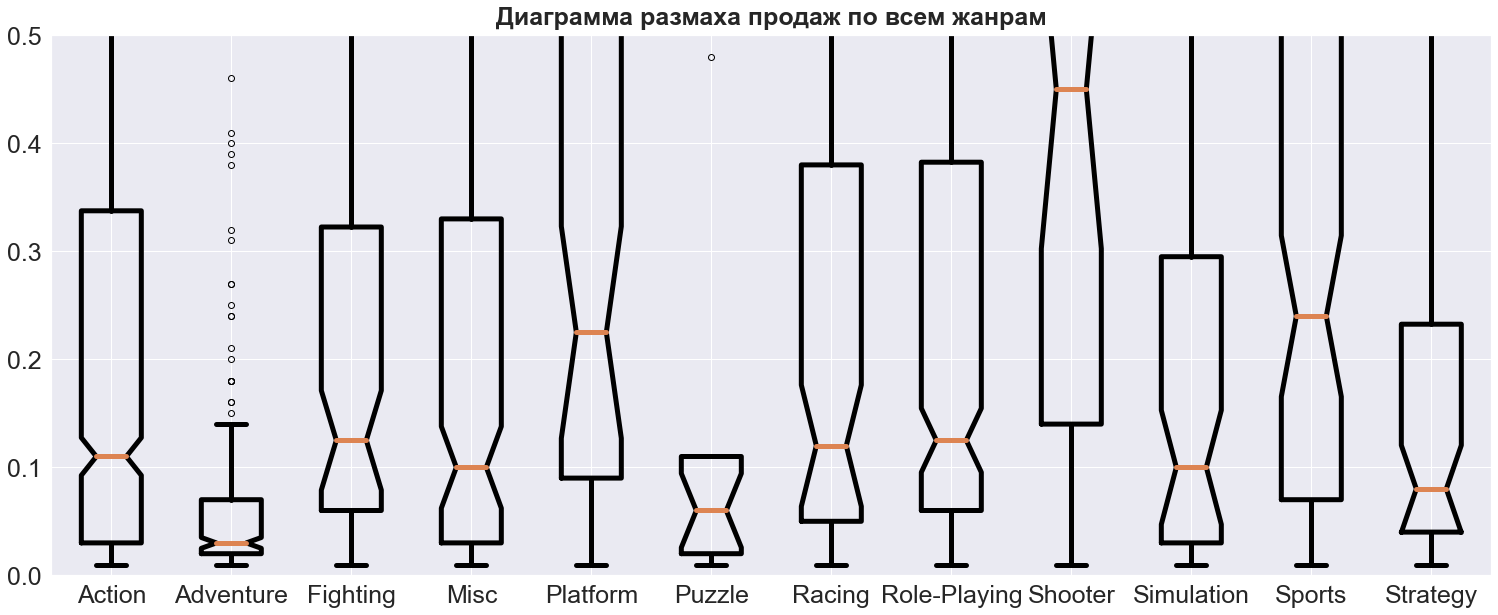

In [66]:
create_any_sales_boxplot('Диаграмма размаха продаж по всем жанрам', query_condition="genre in @all_genres", ylims=[0, 0.5])

А медианные продажи позволют сделать совершенно другой вывод: игры жанра shooter прибыльнее всех, точно опережая игры жанра Sports по сумме выручке. Самая низкая сумма выручки у игр жанра Adventure и Puzzle.

**Опишем отдельно топ по количеству продаж и топ по сумме выручки.**

_Количество проданных копий:_

1) Shooter

2) Sports

3) Platform





_Сумма выручки:_

1) Action

2) Shooter

3) Role-playing


# Шаг 4. Портрет пользователя регионов NA, EU, JP

Определим для пользователя каждого региона (NA, EU, JP):

1) самые популярные платформы (топ-5), опишем различия в долях продаж;

2) самые популярные жанры (топ-5), поясним разницу;

3) определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.


Запишем функцию для прорисовки графиков `top_in_regions_plot`:

Для каждого региона выделим самые популярные платформы (топ-5) и посмотрим доли их продаж.

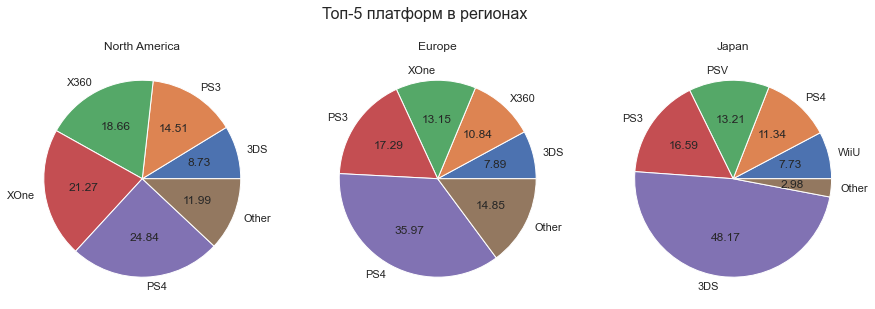

In [67]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
titles =['North America','Europe','Japan']
regions = ['na_sales','eu_sales','jp_sales']

for axes, t, r in zip(axes.flat, titles, regions):
    index = games_actual.groupby('platform')[r].sum().sort_values()[-5:].index.tolist()
    index.append('Other')
    
    l = len(games_actual.groupby('platform')[r].sum().sort_values())
    values = games_actual.groupby('platform')[r].sum().sort_values()[-5:].values.tolist()
    values.append(games_actual.groupby('platform')[r].sum().sort_values()[0:l-5].sum()) 
    
    axes.pie(x=values, labels=index, autopct="%.2f")
    axes.set(title = t)

fig.suptitle('Топ-5 платформ в регионах', fontsize=16)
plt.show()

В Северной Америке имеют (имели) бешеную популярность приставки PS4 (24.84%) и XOne(21.27%). Далее Х360 и PS3 - 18.66% и 14.51%. И 5-ое место занимает 3DS (8.73%)

В Европе (были) популярны PS4 (35.97%), PS3 (17.29%), XOne (13.15%), X360 (10.84%), 3DS (7.89%). 

В Японии, как обычно, всё наоборот. Лидер - 3DS (48.17%). Далее PS3(16.59%) За ними PSP (13.21%) и PS4(11.34%). Далее всем известный Wii.

**4.2. Определение самых популярных жанров в заданных регионах:**

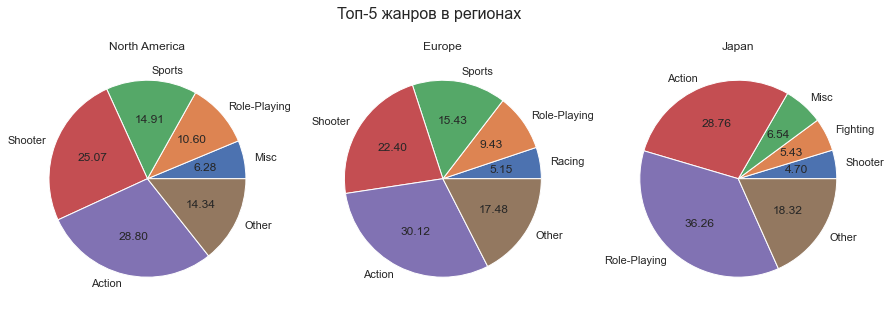

In [68]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
titles =['North America','Europe','Japan']
regions = ['na_sales','eu_sales','jp_sales']

for axes, t, r in zip(axes.flat, titles, regions):
    index = games_actual.groupby('genre')[r].sum().sort_values()[-5:].index.tolist()
    index.append('Other')
    
    l = len(games_actual.groupby('genre')[r].sum().sort_values())
    values = games_actual.groupby('genre')[r].sum().sort_values()[-5:].values.tolist()
    values.append(games_actual.groupby('genre')[r].sum().sort_values()[0:l-5].sum()) 
    
    axes.pie(x=values, labels=index, autopct="%.2f")
    axes.set(title = t)

fig.suptitle('Топ-5 жанров в регионах', fontsize=16)
plt.show()

Вкусы в Северной Америке, Европе схожи: и там, и там живут фанаты экшнов, спортивных игр и шутеров, ролевые игры. Различие заключается лишь в том, что в Северной Америке больше играют в игры смешанного типа, в Европе же чаще выбирают гонки.


В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны, смешанного типа, боевые и шутеры.


**4.3. Влияние рейтинга ESRB на продажи в отдельном регионе**

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Расшифровка рейтинга ESRB:

- EC (Early Childhood) — для детей младшего возраста;
- E (Everyone) — для всех;
- E10+ (Everyone 10 and older) — для всех старше 10 лет;
- T (Teen) — подросткам 13-19 лет;
- M (Mature 17+) — от 17 лет;
- AO (Adults only 18+) — только для взрослых;
- K-A (Kids to Adults)— для детей и взрослых;
- RP (Rating pending) — категория не определена

Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает:

In [69]:
ESRB_dict = {'EC': '<10 лет', 'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'AO': '18+', 'K-A': 'Для всех(устар.)', 'RP': 'Нет категории'}
games_actual['ESRB_description'] = games_actual[games_actual['rating'].notnull()]['rating'].map(ESRB_dict)

Построим функцию: 

In [70]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games_actual.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Посмотрим на продажи игр по рейтингу:

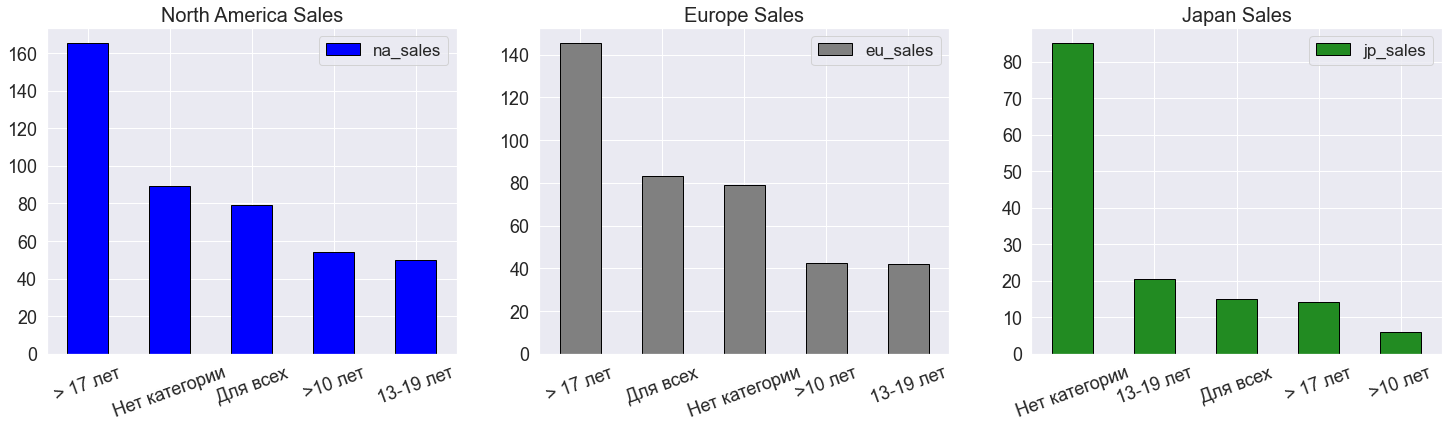

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "для лиц старше 17 лет", далее "Для всех" Однако, хотя рейтинг ESRB популярен в основном в Северной Америке, удичительно, что количество игровых консолей, не имеющих категории, больше в Северной Америке, чем в Европе.

В Японии опять не так. Поскольку в Японии больше всего популярны DS и 3DS, то есть игры японского происхождения, то и рейтинга у них естественно нет. Поэтому первое место по возрастной группе является такое же - "Для всех", а вот на втором - игры для лиц от 13 до 19 лет. Неудивительно, ведь целевая аудитория для игр там более молодая, нежели во всем мире. Это обусловленно культурными различиями и тенденциями менталитета. 

Также, необходимо отметить, что в Северной Америке продажи выше, чем в Европе, а в Европе - выше, чем в Японии (казалось бы).

# Шаг 5. Проверка гипотез

**Гипотезы:**

1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05

**5.1. Гипотеза № 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [72]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77          -1.0        -1.0     RP   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00          -1.0        -1.0     RP   

   sales_total  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [73]:
xbox_one_ratings = games_actual[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] > 0)]['user_score']
pc_ratings = games_actual[(games_actual['platform'] == 'PC') & (games_actual['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.4788255981357277
p-value = 1.4012658404e-01

Пороговое значение alpha = 0.05


Смело отклоняем нулевую гипотезу.
Верно следующее утверждение: _средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой._

Посмотрим в чью пользу:

In [74]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 6.27


Компьютерные игры получают оценки статистически незначительно ниже, чем игры для Xbox One, хотя разница аж в целых 0.35.

**5.2. Гипотеза № 2: средние пользовательские рейтинги жанров Action и Sports разные.**

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [75]:
action_ratings = games_actual[(games_actual['genre'] == 'Action') & (games_actual['user_score'] > 0)]['user_score']
pc_ratings = games_actual[(games_actual['genre'] == 'Sports') & (games_actual['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 11.535100577928208
p-value = 0.0000

Пороговое значение alpha = 0.05


Не можем отвергнуть нулевую гипотезу.

Таким образом, остается верным утверждение, что _средние пользовательские рейтинги жанров Action и Sports одинаковые._

# Шаг 6. Общий вывод

Влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков (чем больше влияние отзывов критиков, тем выше продажи). Оценки пользователей таким влиянием на выручку похвастаться не могут.

В целом про положение дел в игровой индустрии: рынок "немобильных" игр постепенно погибает. Все сейчас в погоне за графикой, новыми технологиями, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не так ценит идею и глубины игры, большинство может обрадовать только хорошая картинка и оптимизация - а играть им понравится только в том случае, если в игре будут стрелочки куда идти. Иначе это слишком трудно.

В итоге, гиганты игровой индустрии гоняются за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферой - сейчас не ценится.
Всё это привело к тому, что рынок уже который год падает. И, скорее всего, до сих пор падает, потому что тенденций к изменению ценностей на те, которые были всего с десяток лет назад, уже нет.


Вне зависимости от региона самыми популярными играми являются, которые имеют рейтинг ESRB E - "для лиц, старше 17 лет". 
Самыми оптимальными платформами могут послужить PS4, PS3 и 3DS, так как они входят в топ-5 в каждом регионе.

Если рекламировать игры  в любом регионе, то лучше выбрать игры жанров "Action" или "Role-playing". 

Если выбирать один конкретный регион, то лучше всего выбрать Северную Америку, где продажи выше, следовательно и спрос выше. Либо в Японии, где рынок игр не такой богатый, но зато можно было бы занять определенную нишу в продажах игр.